In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


age: age in years 

sex: (1 = male; 0 = female) 

cp: chest pain type 

trestbps: resting blood pressure (in mm Hg on admission to the hospital) 

chol: serum cholestoral in mg/dl 

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

restecg: resting electrocardiographic results 

thalach: maximum heart rate achieved 

exang: exercise induced angina (1 = yes; 0 = no) 

oldpeak: ST depression induced by exercise relative to rest 

slope: the slope of the peak exercise ST segment 

ca: number of major vessels (0-3) colored by flourosopy 

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

target: 1 or 0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import seaborn as sns #plotting package
import graphviz #to visualize decision trees
from sklearn import datasets
df = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.columns = ['age','sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_ECG', 'max_heart_rate', 'angina_from_exercise',
          'st_depression', 'st_slope','major_vessels_with_flourosopy','thalassemia','target']


In [5]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,max_heart_rate,angina_from_exercise,st_depression,st_slope,major_vessels_with_flourosopy,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ECG,max_heart_rate,angina_from_exercise,st_depression,st_slope,major_vessels_with_flourosopy,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


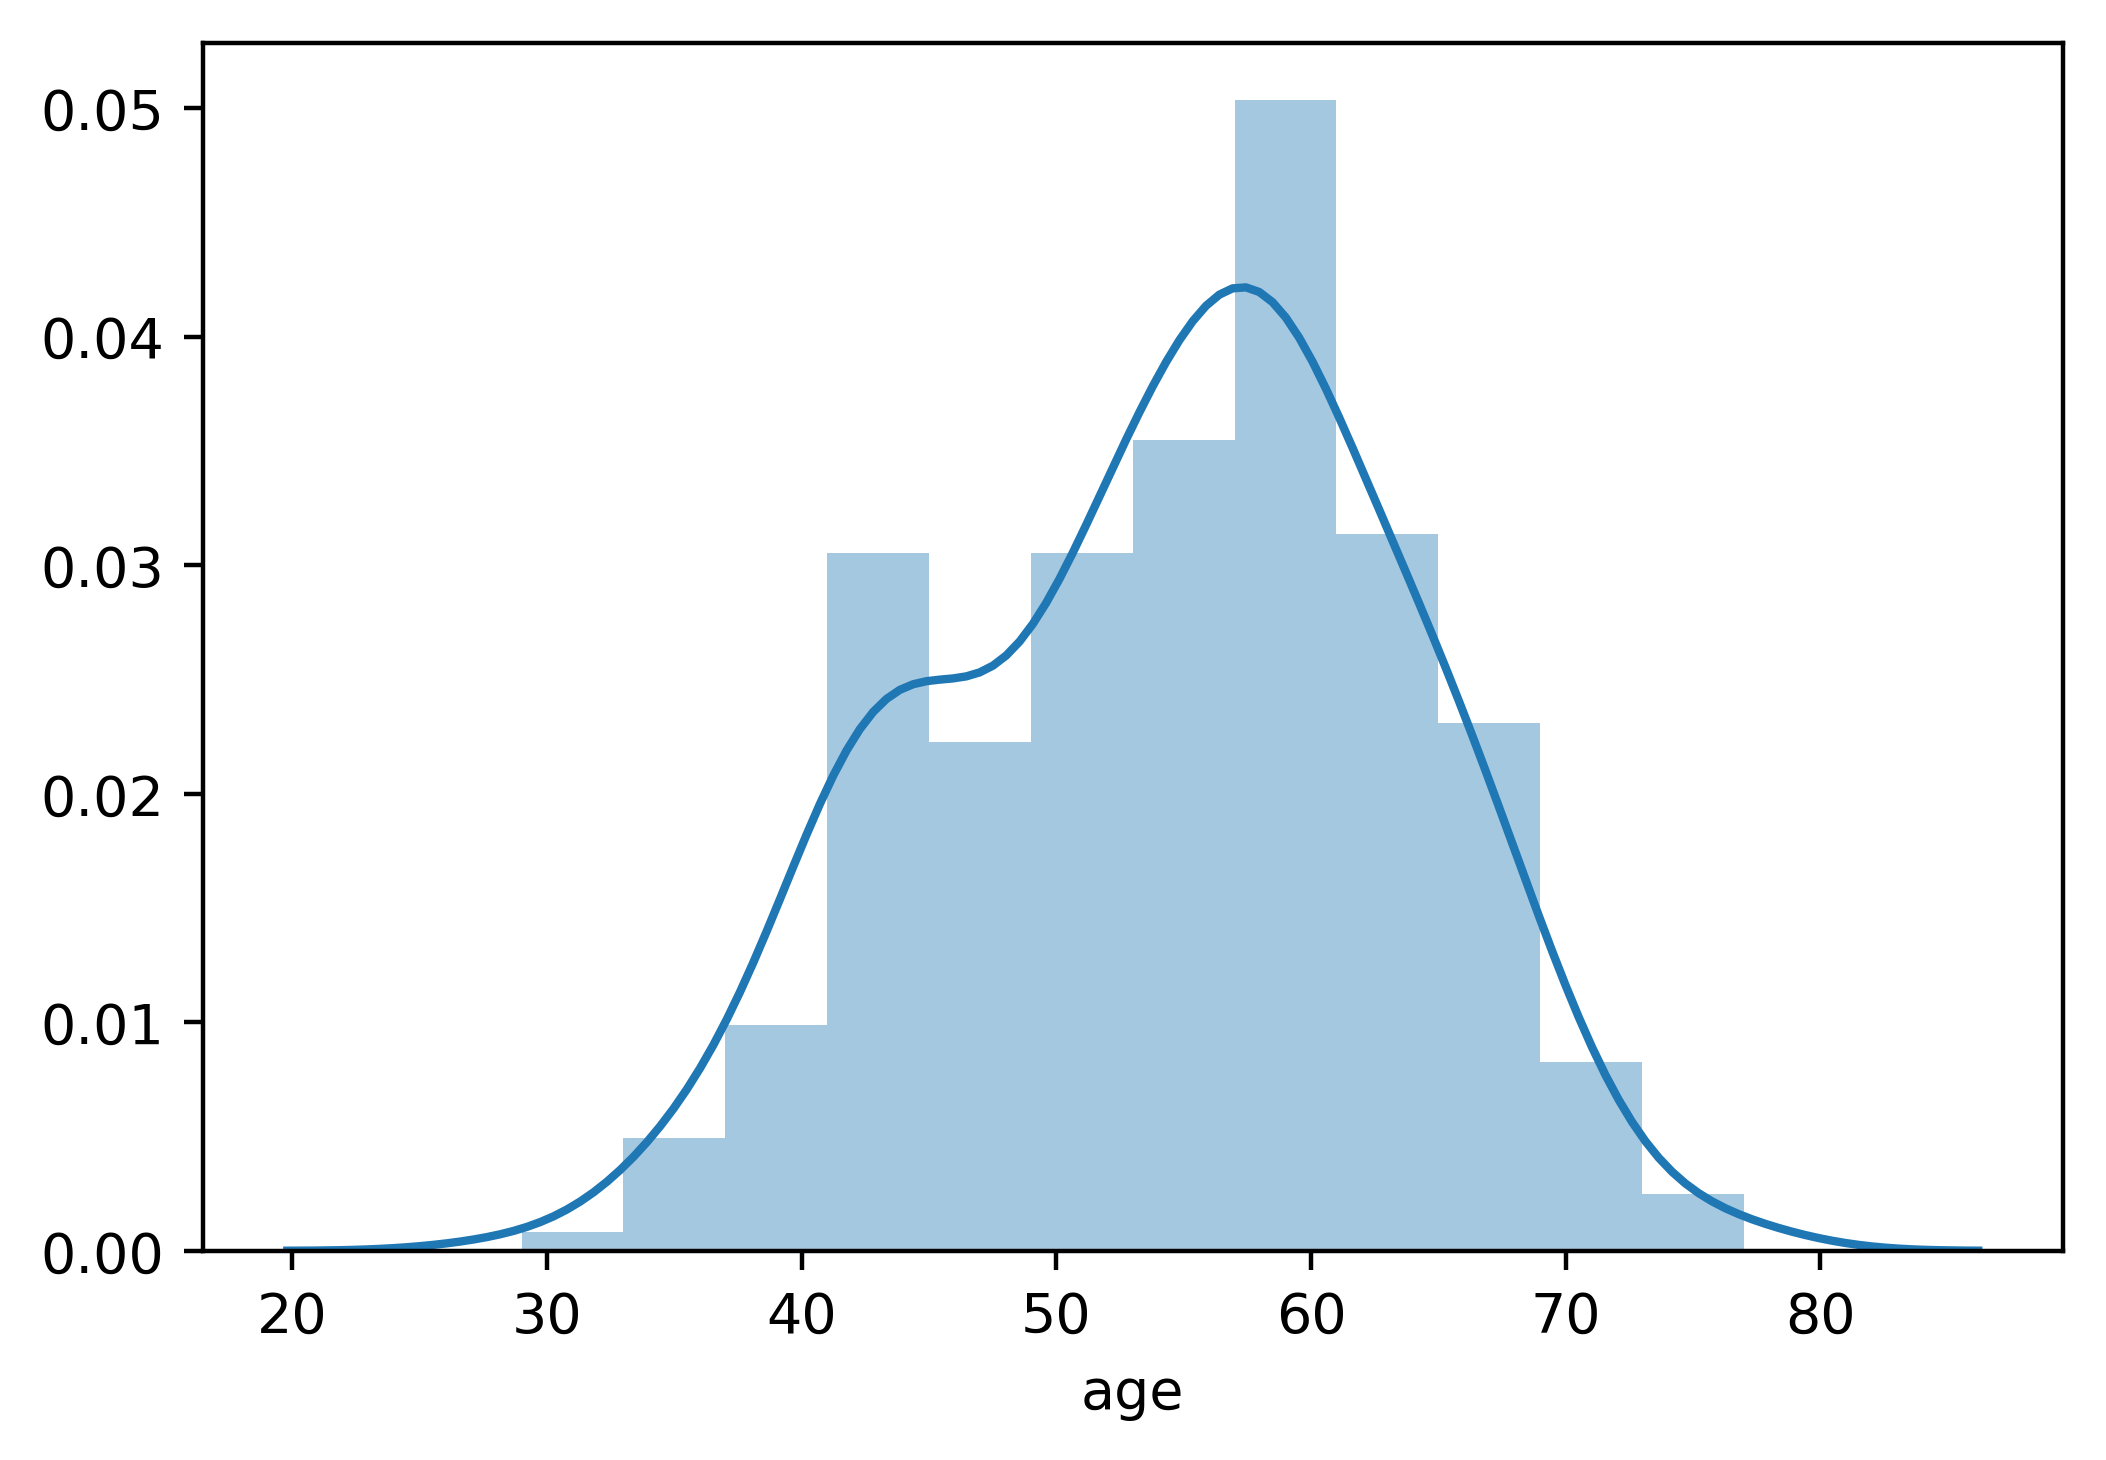

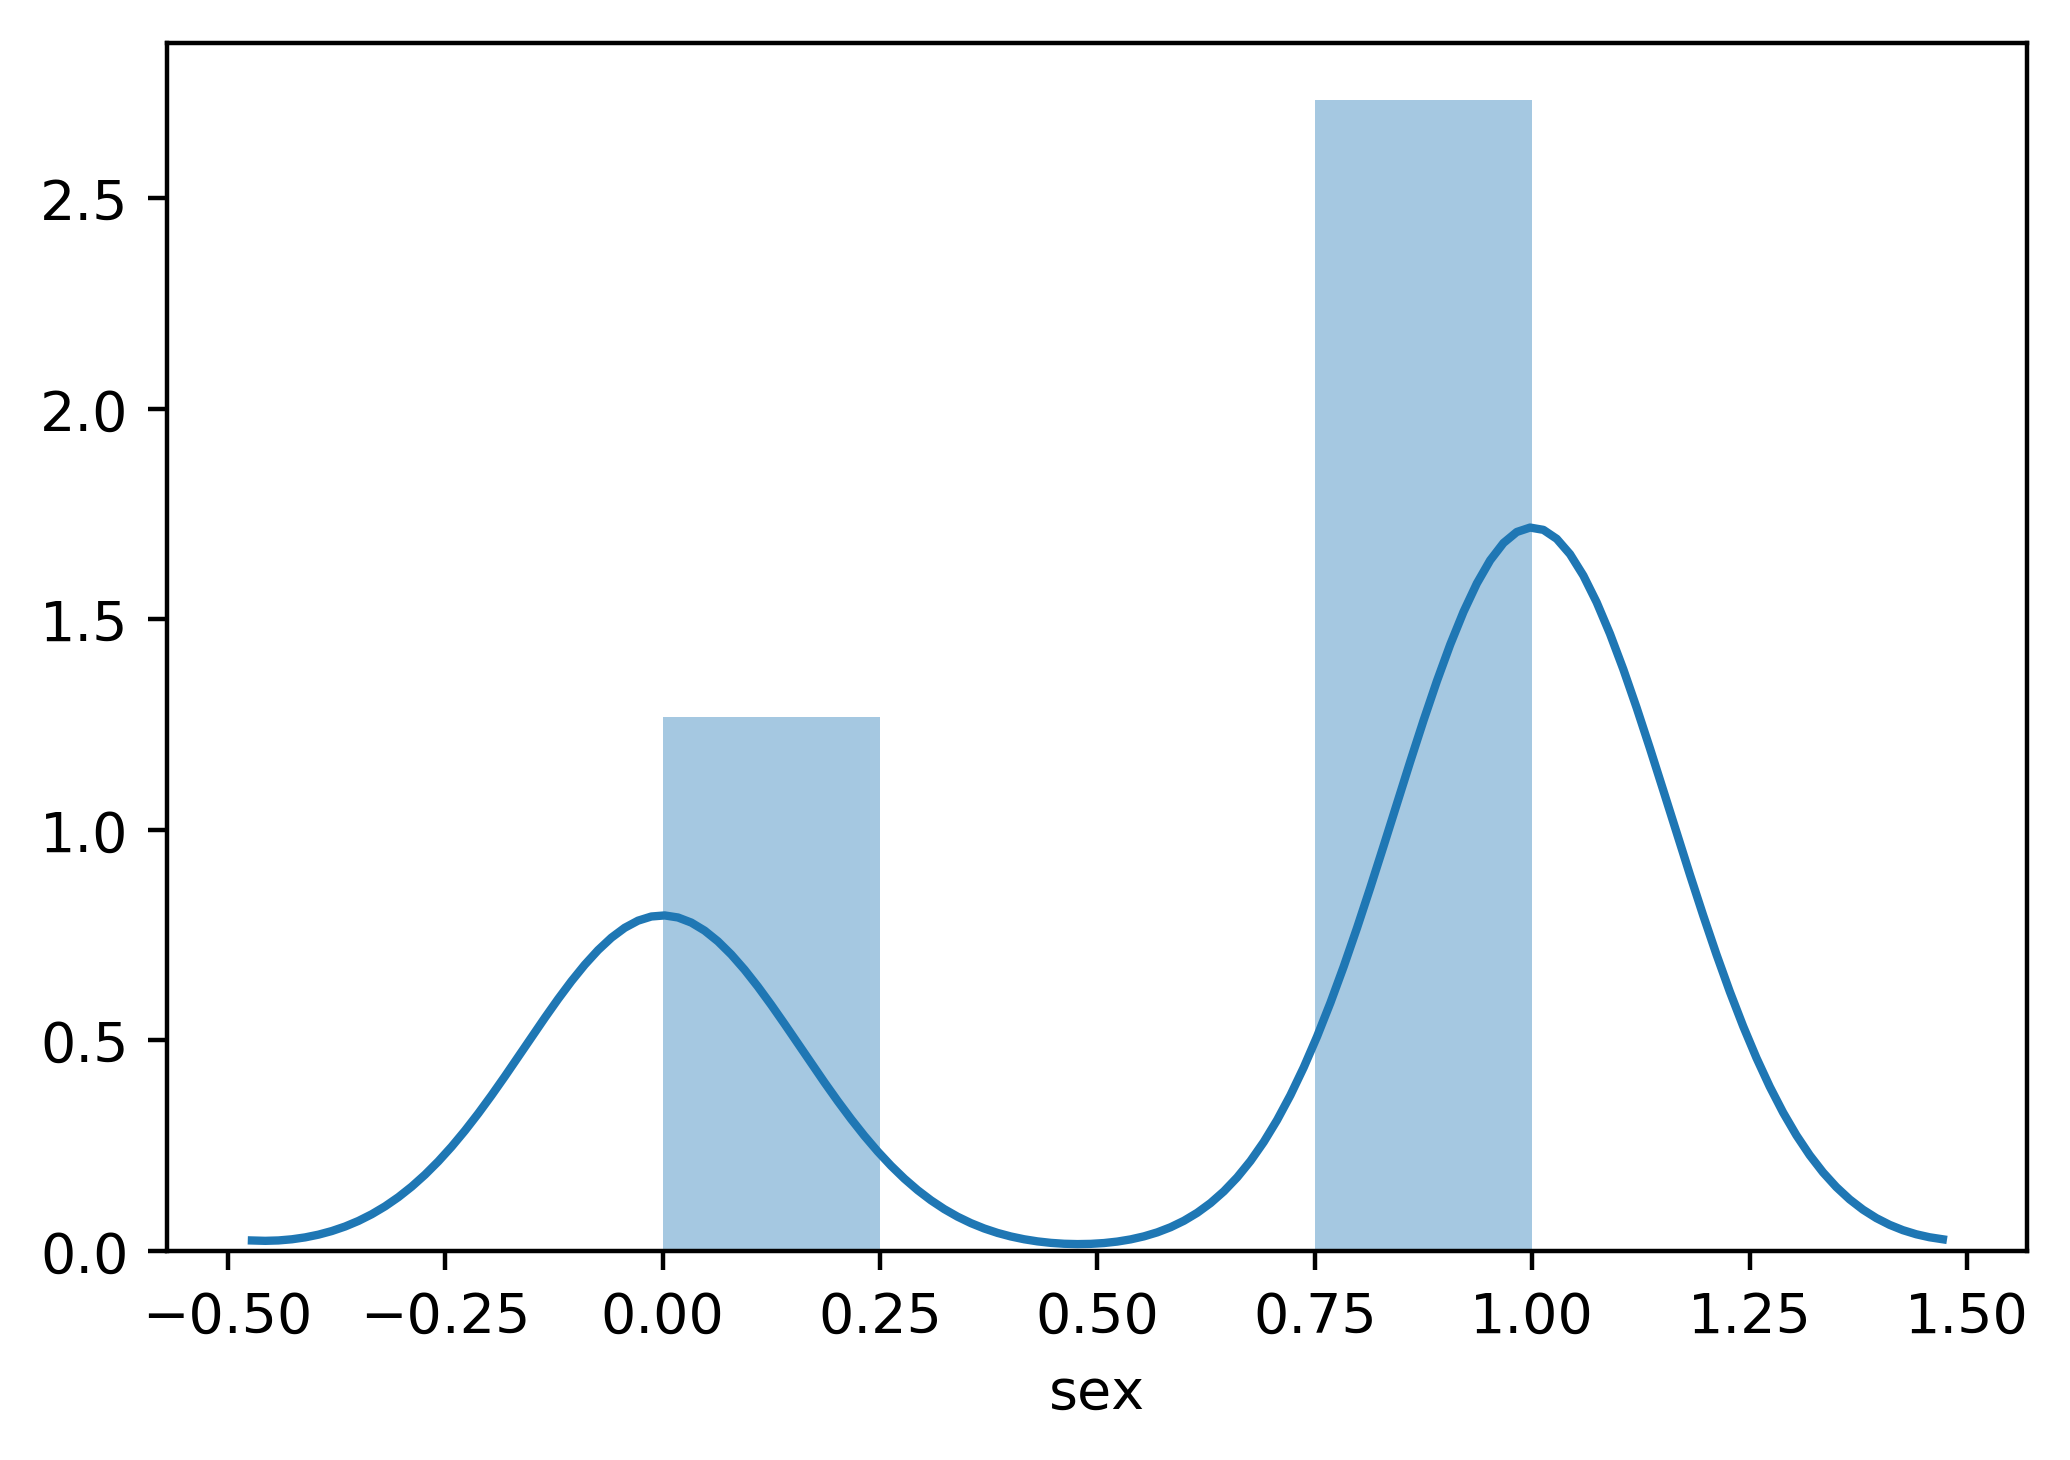

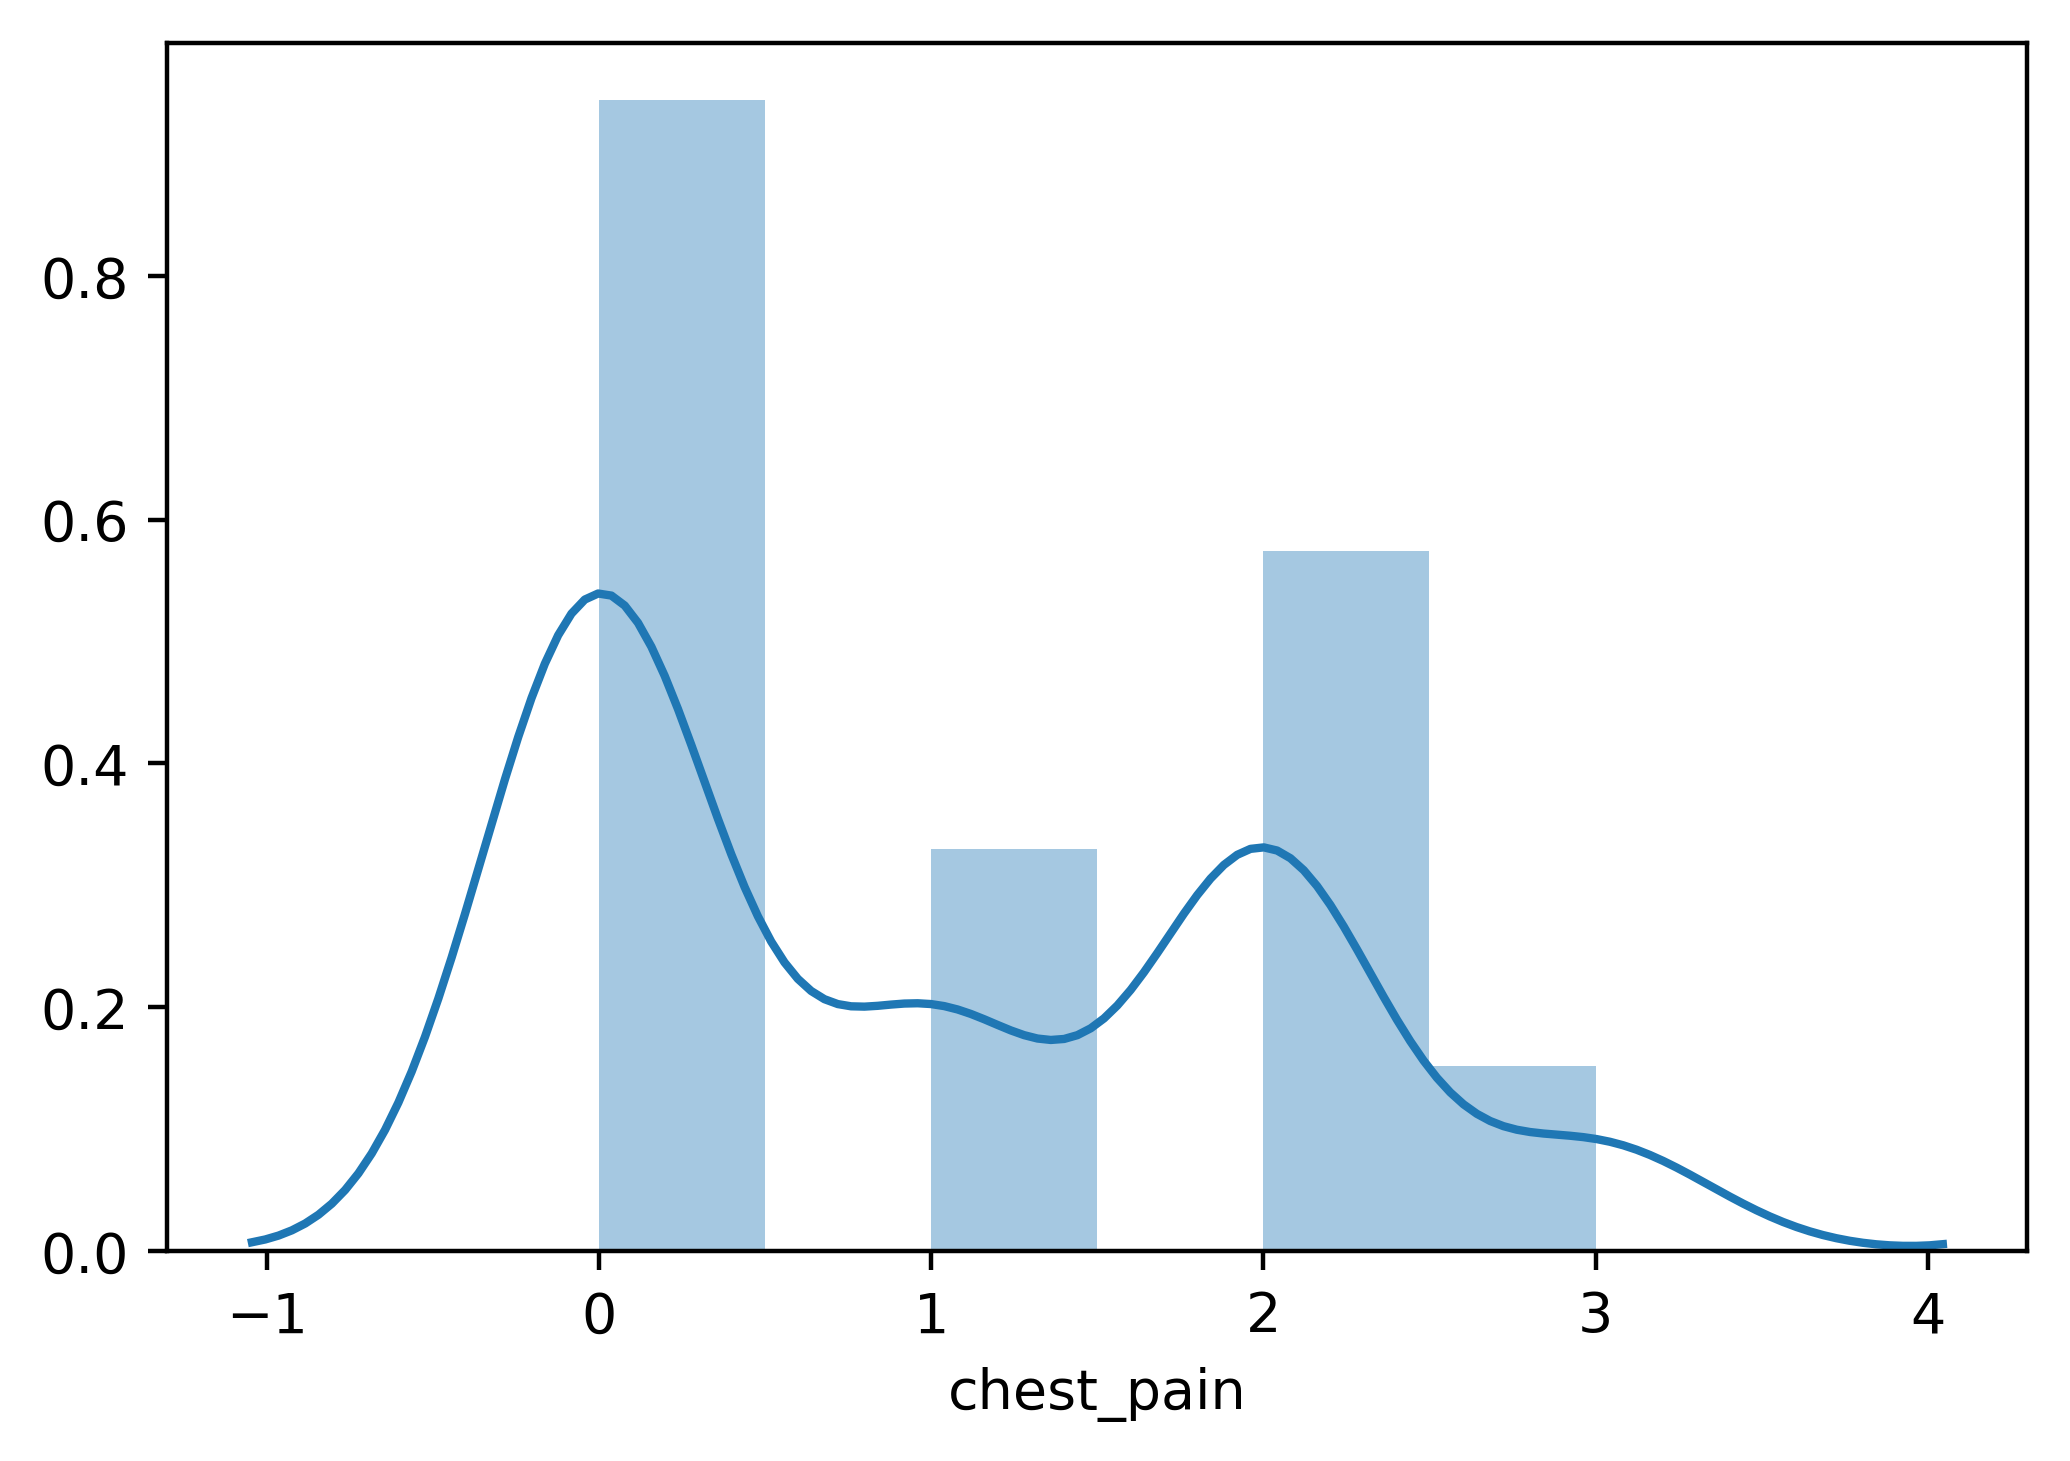

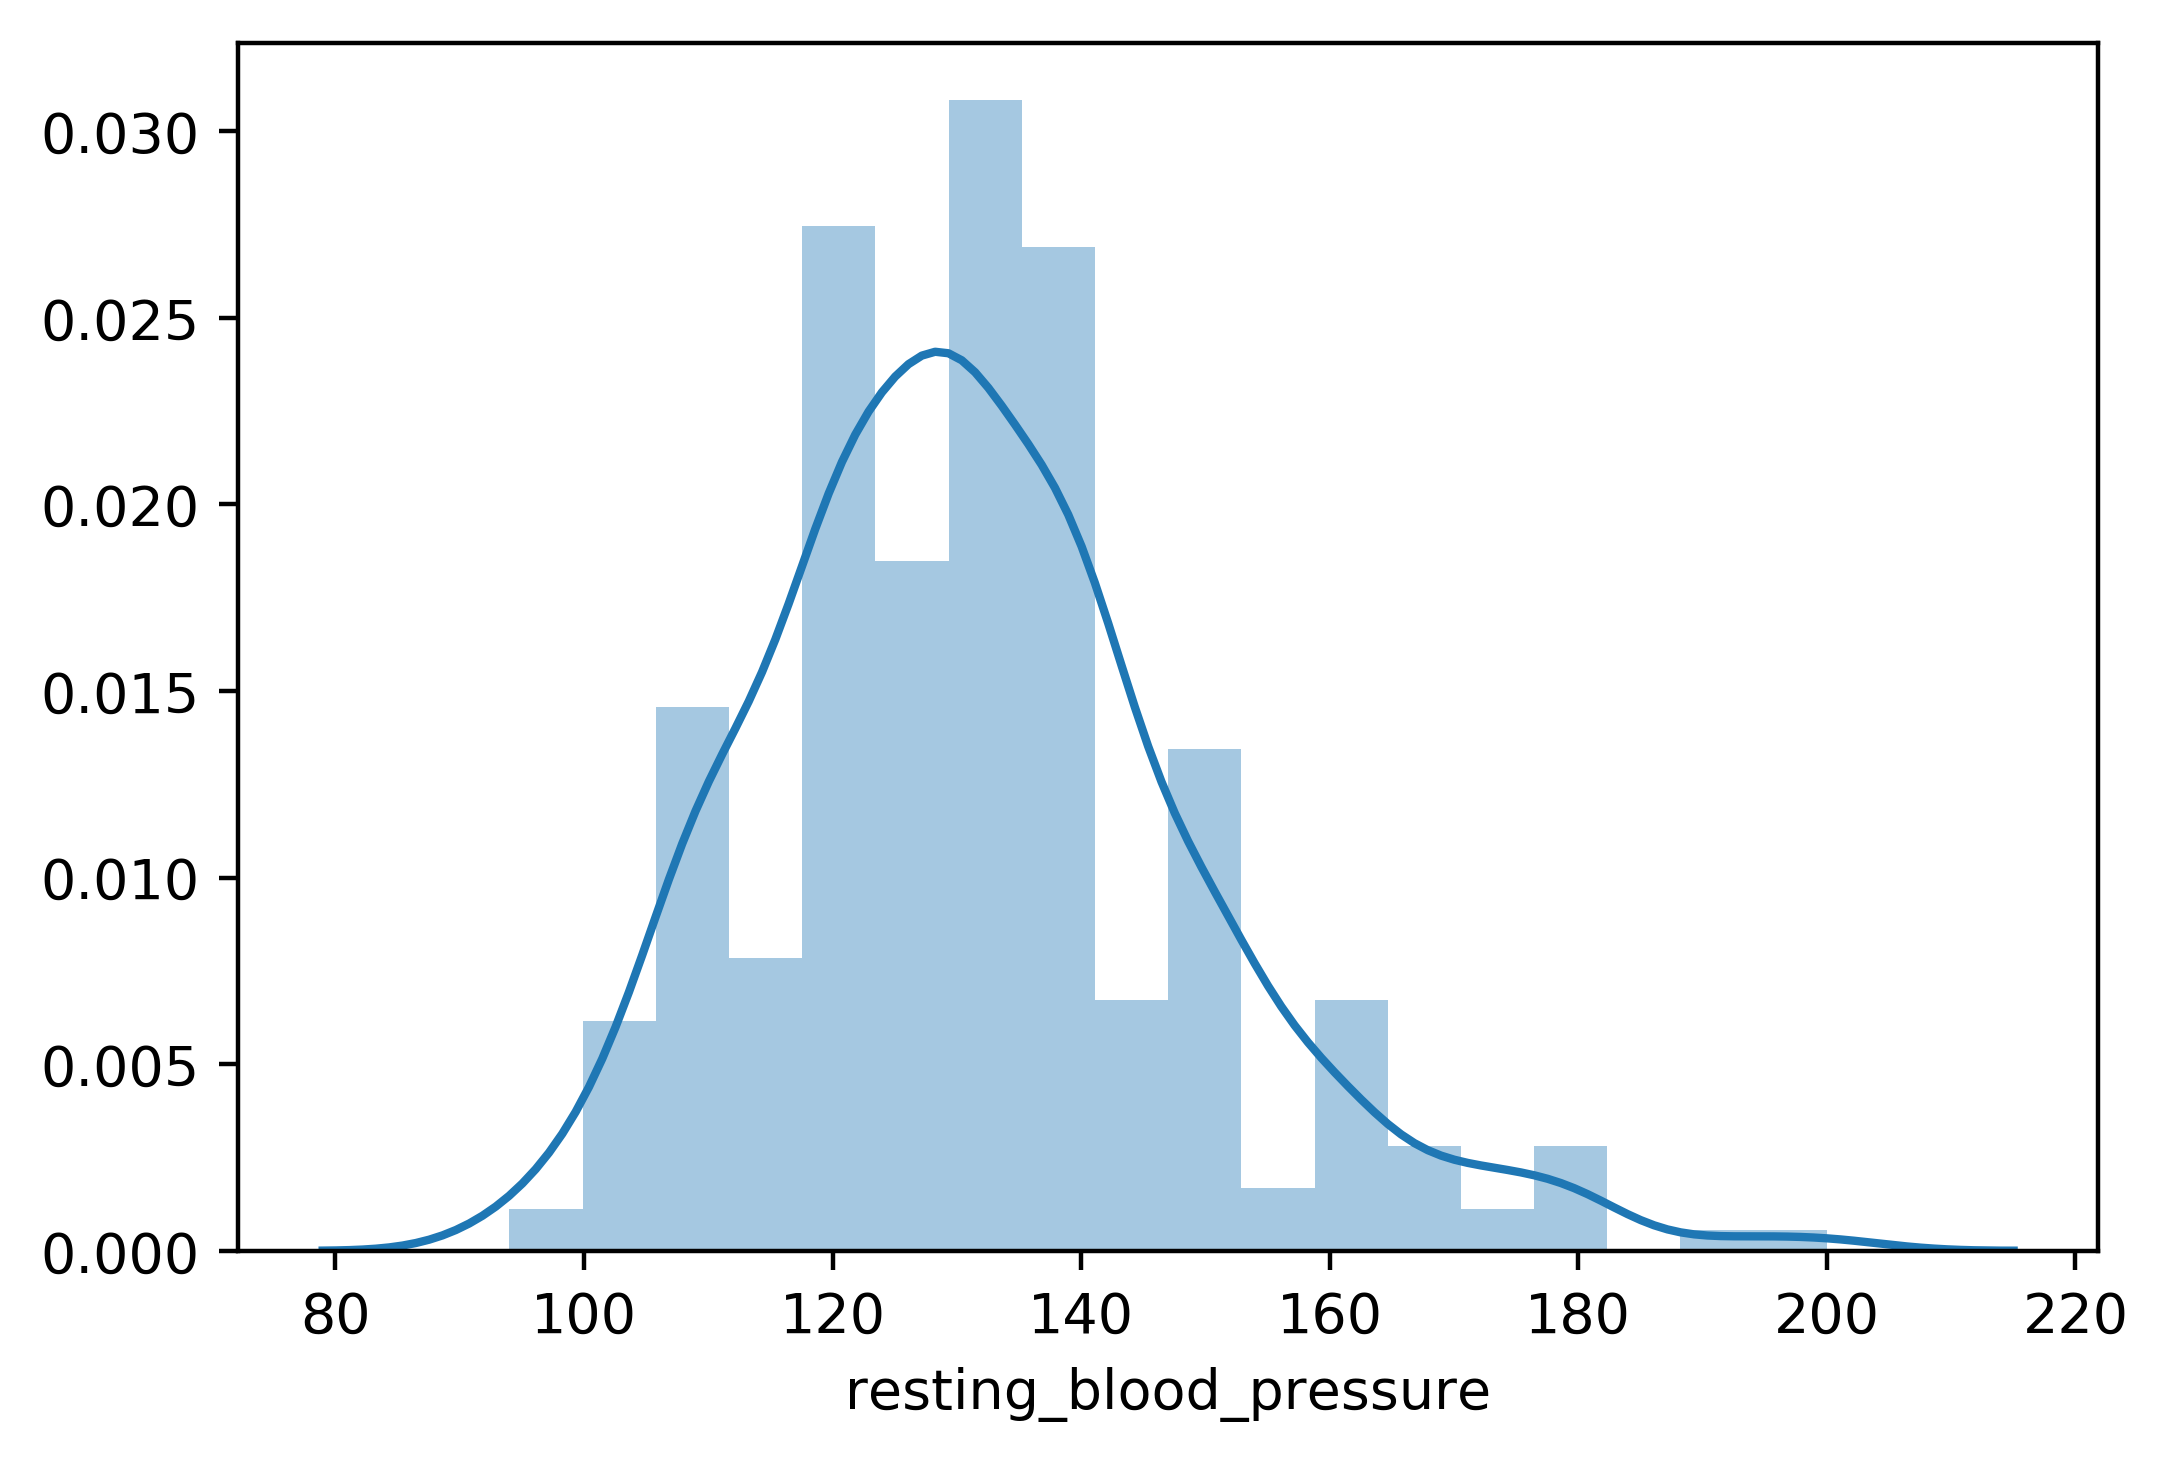

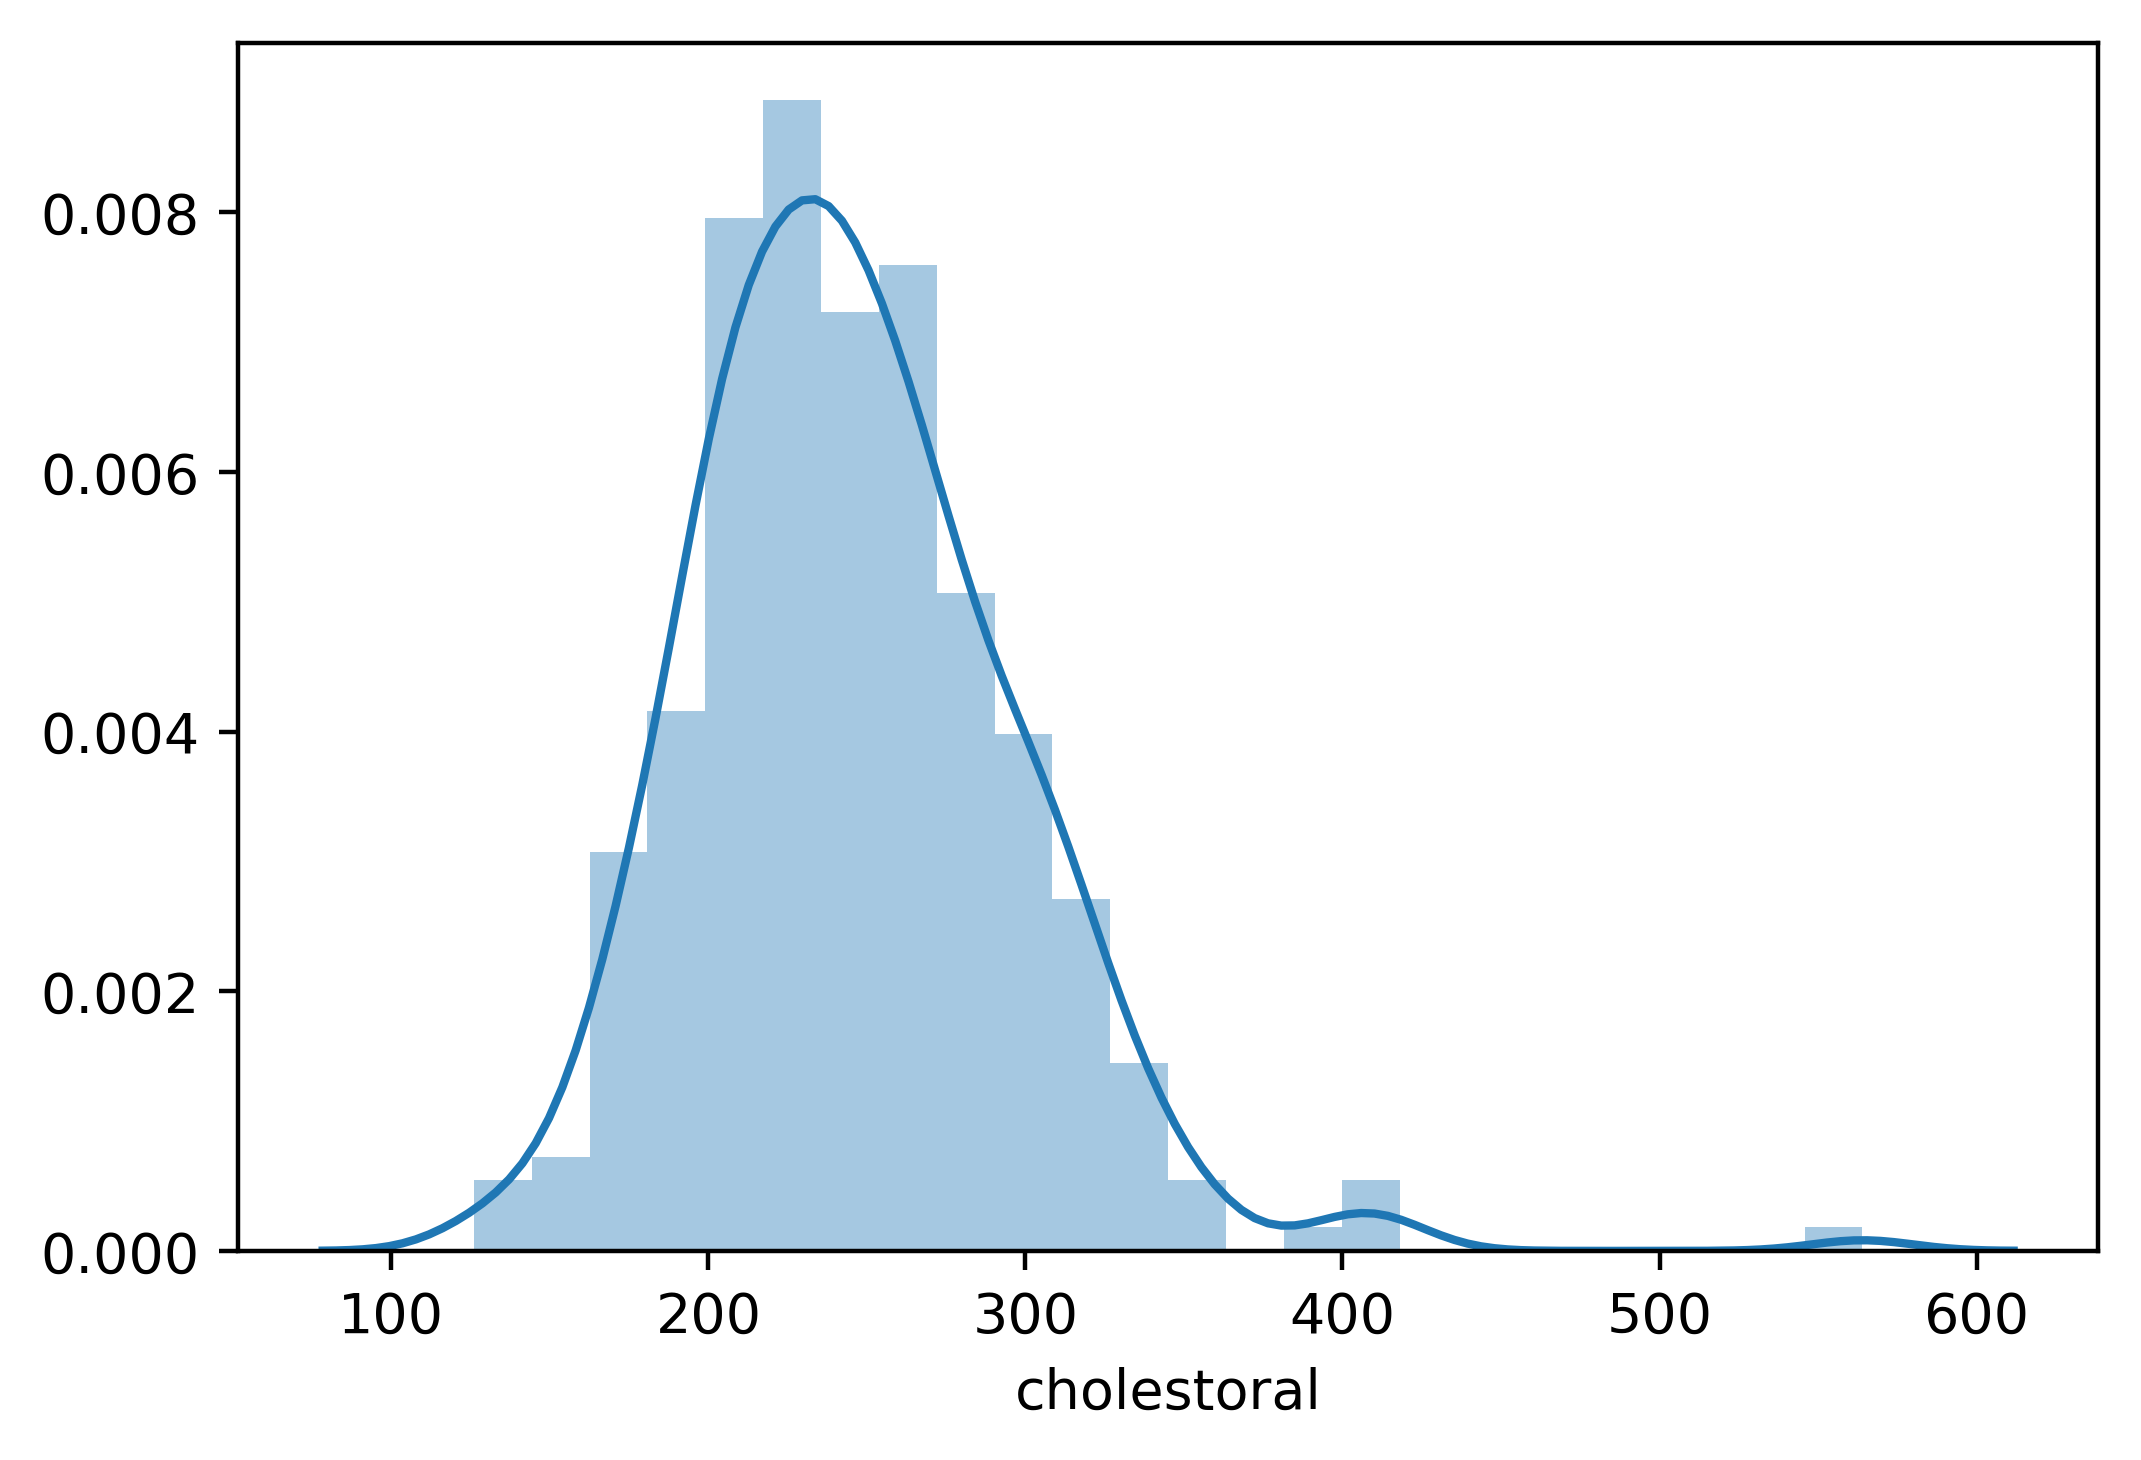

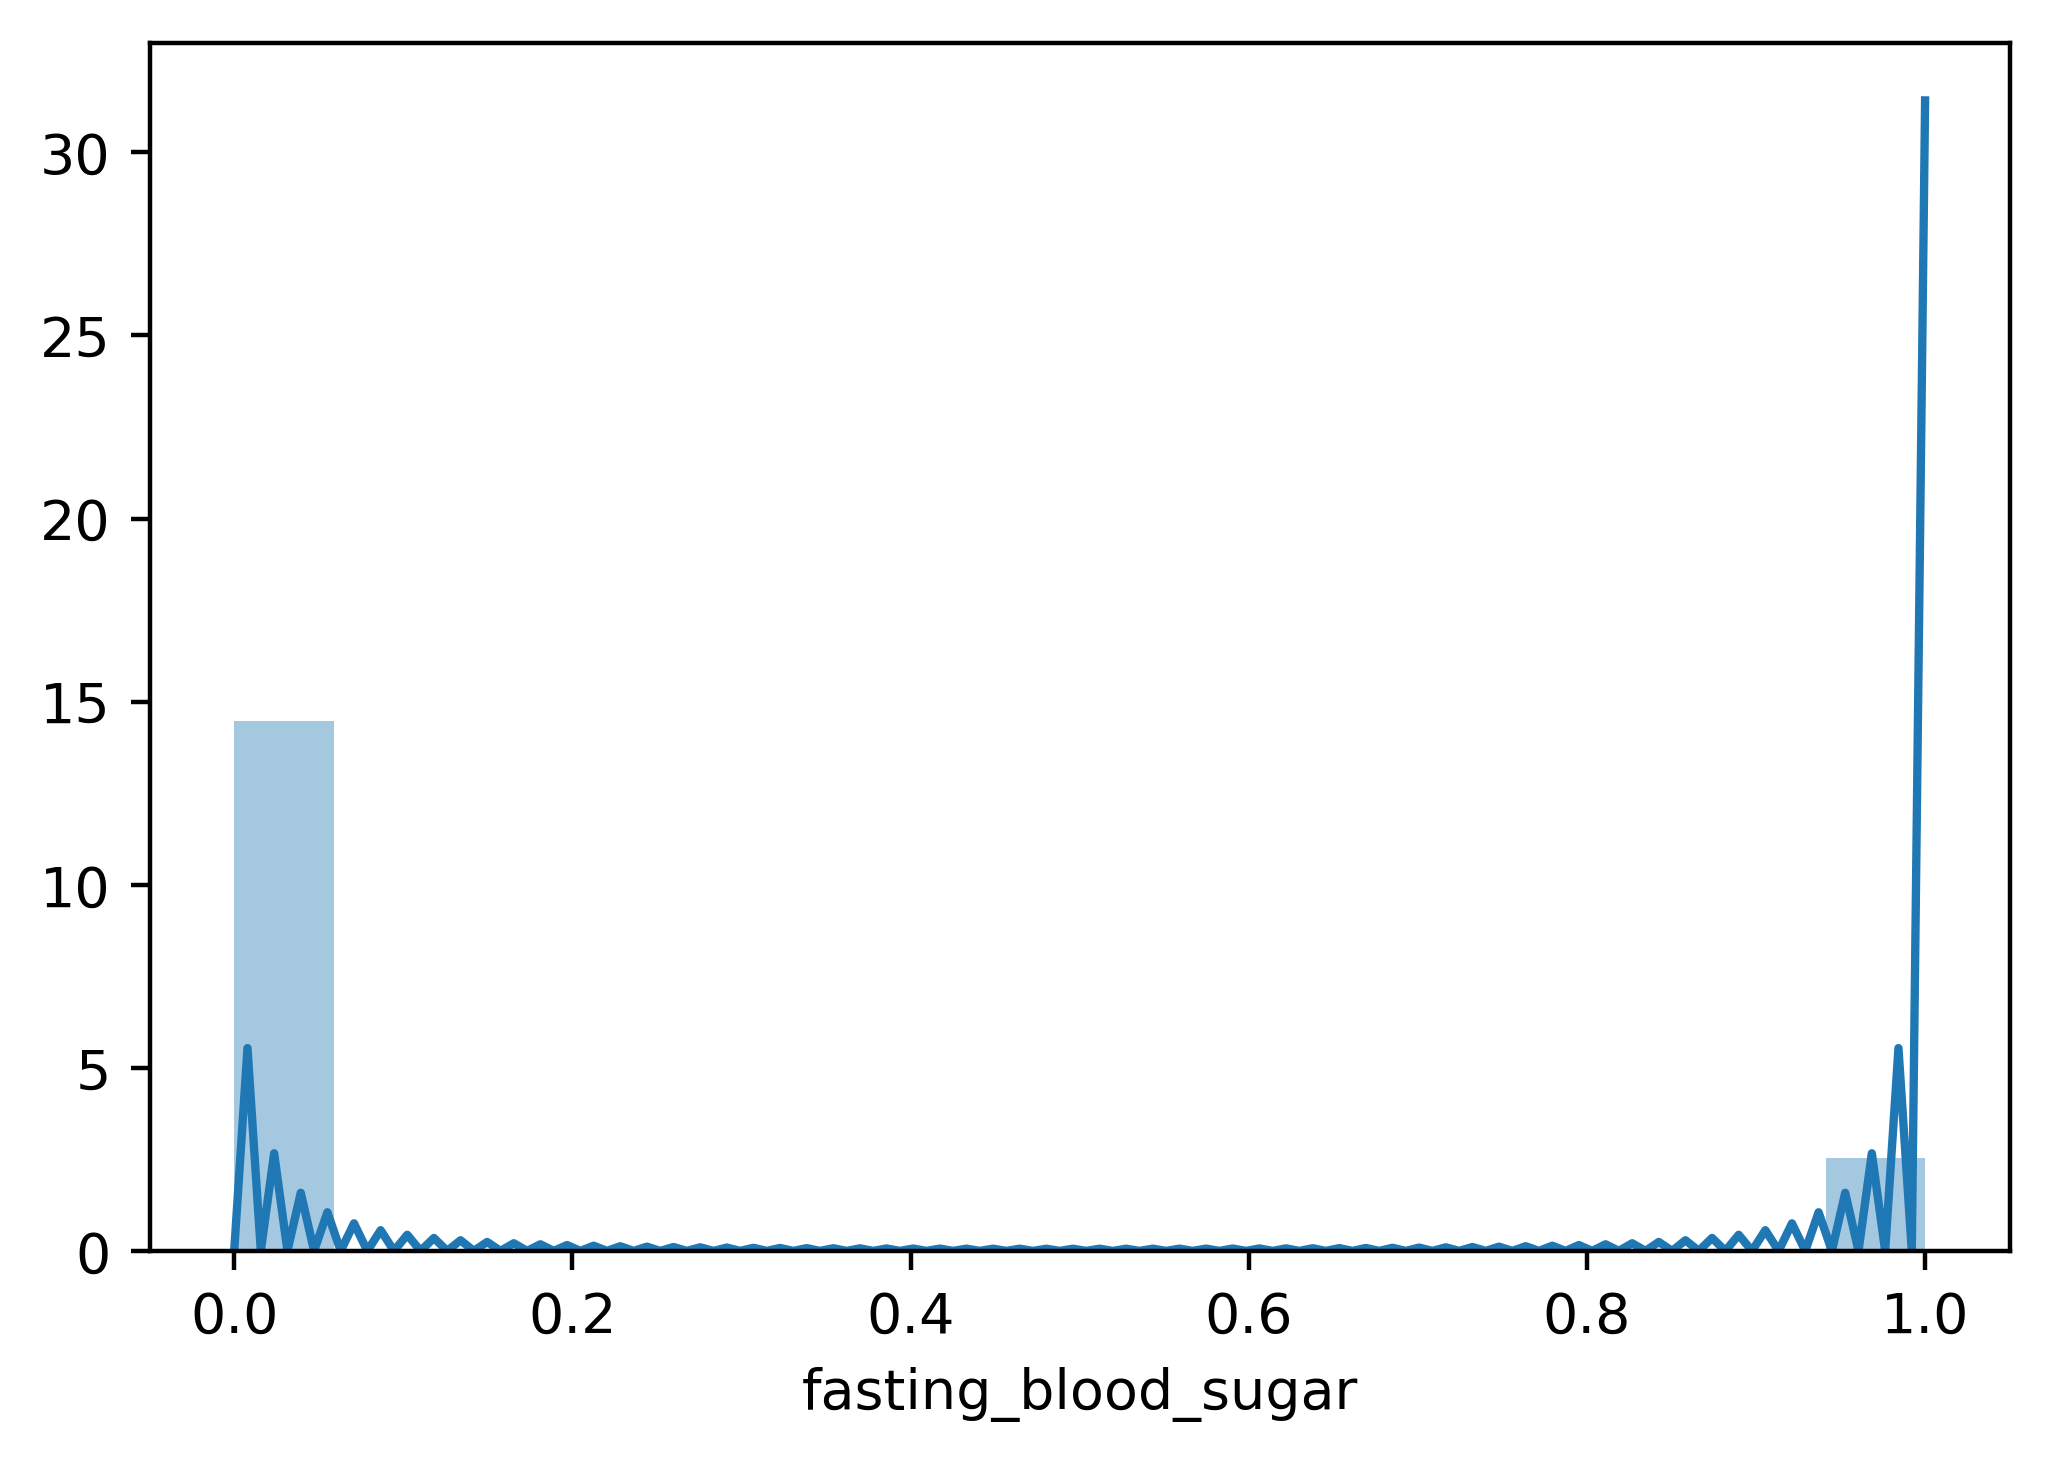

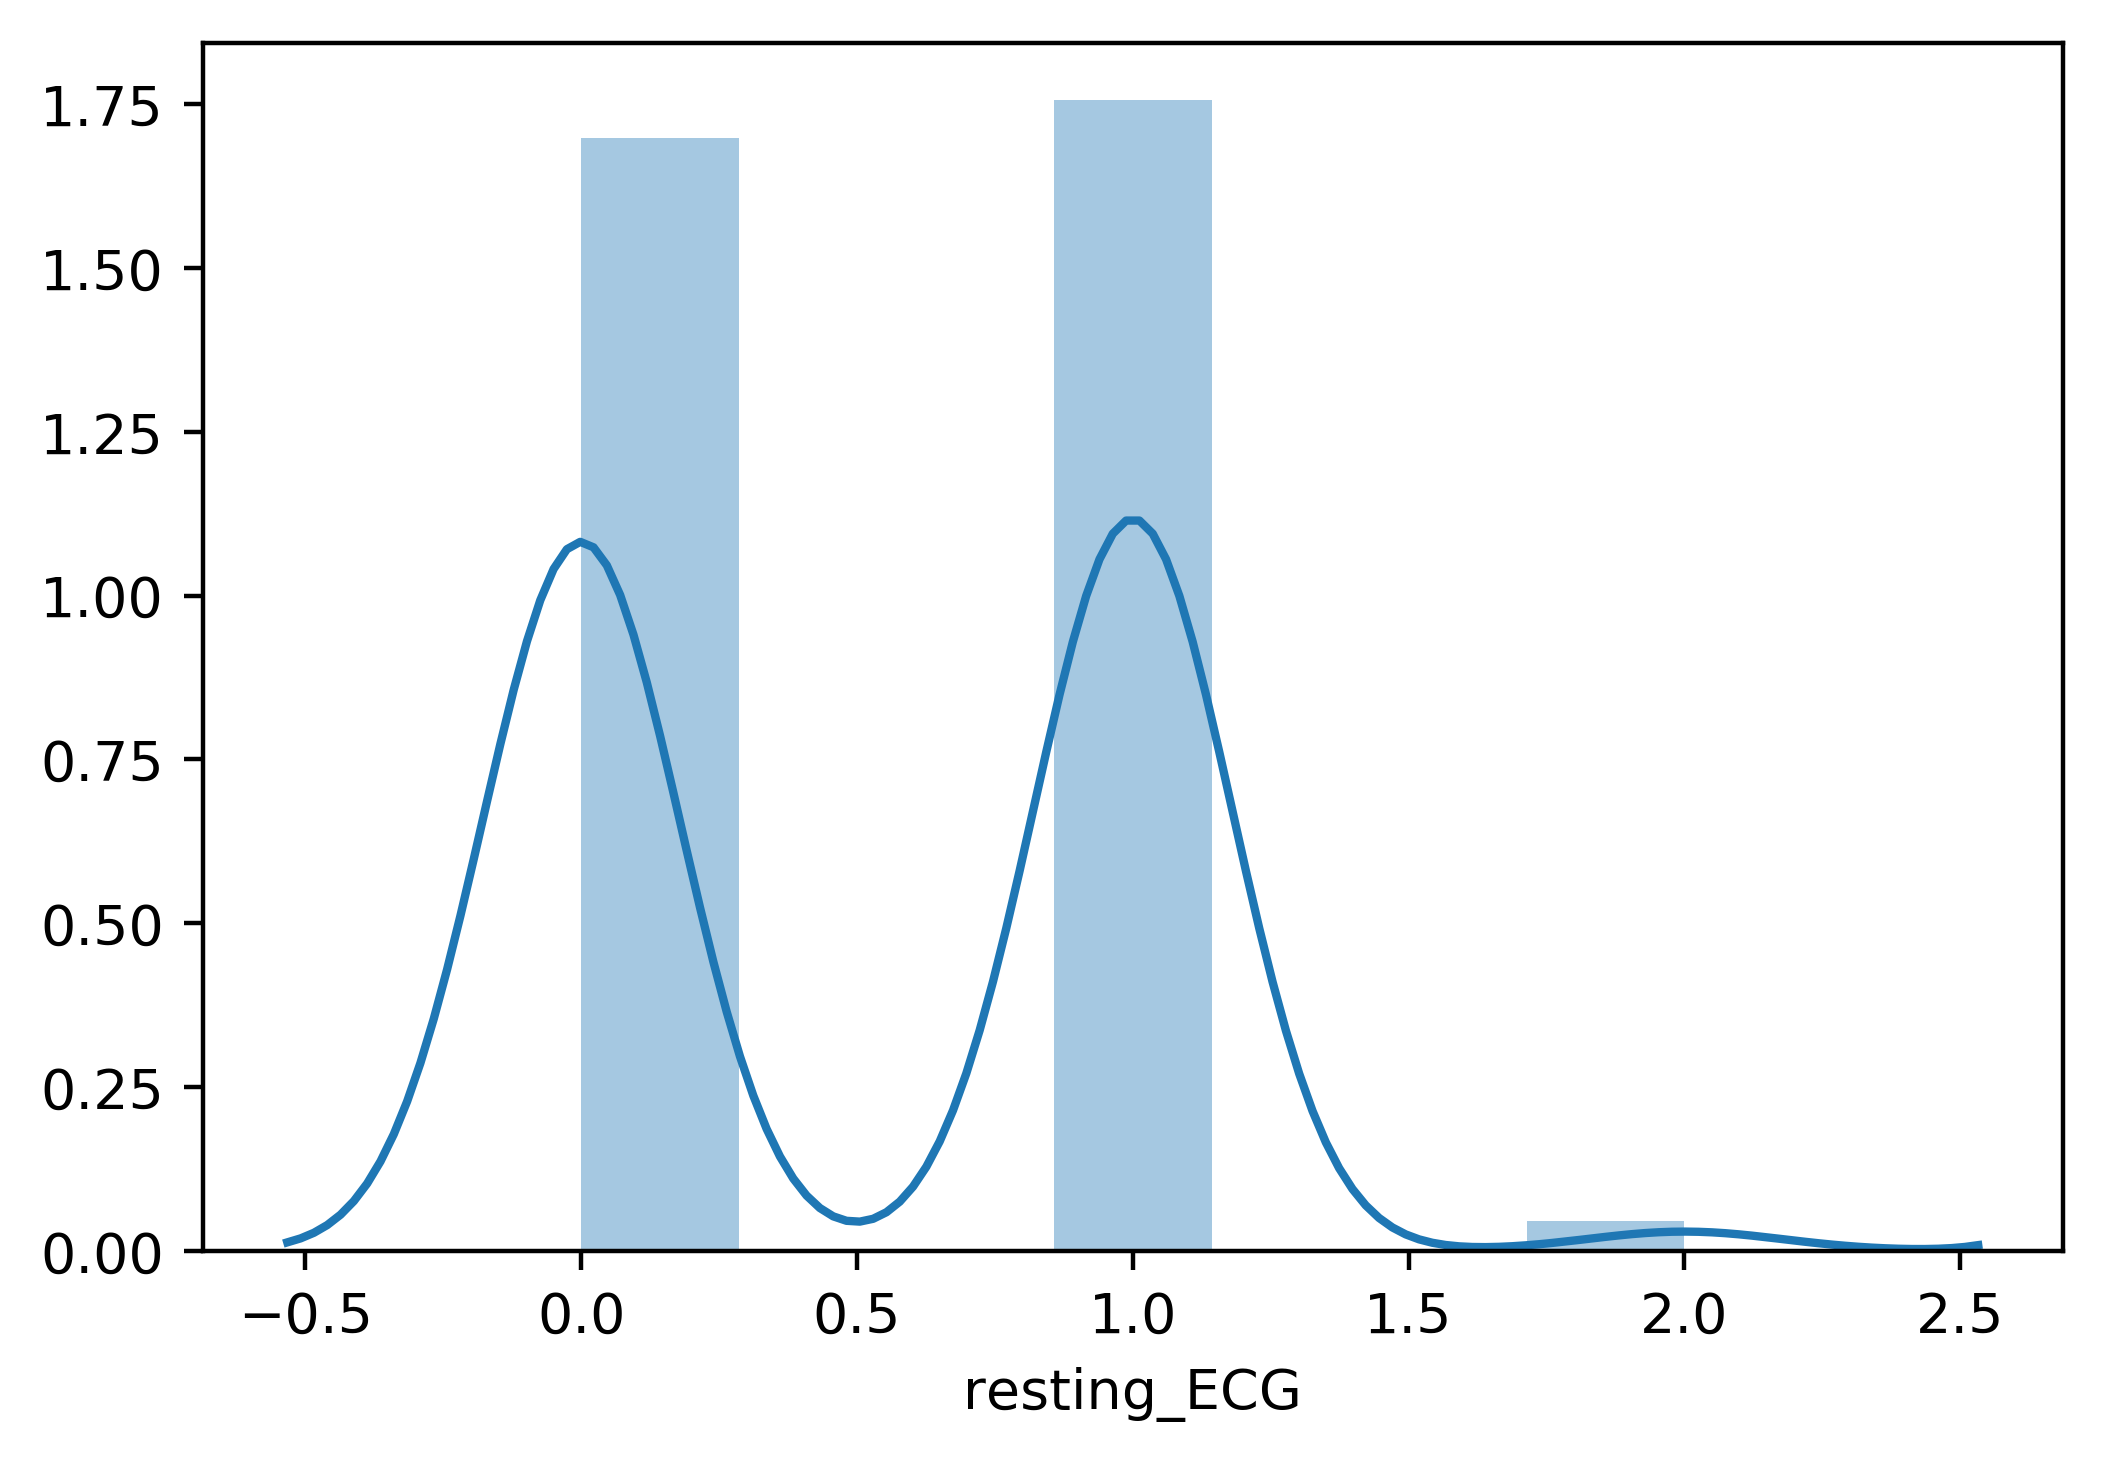

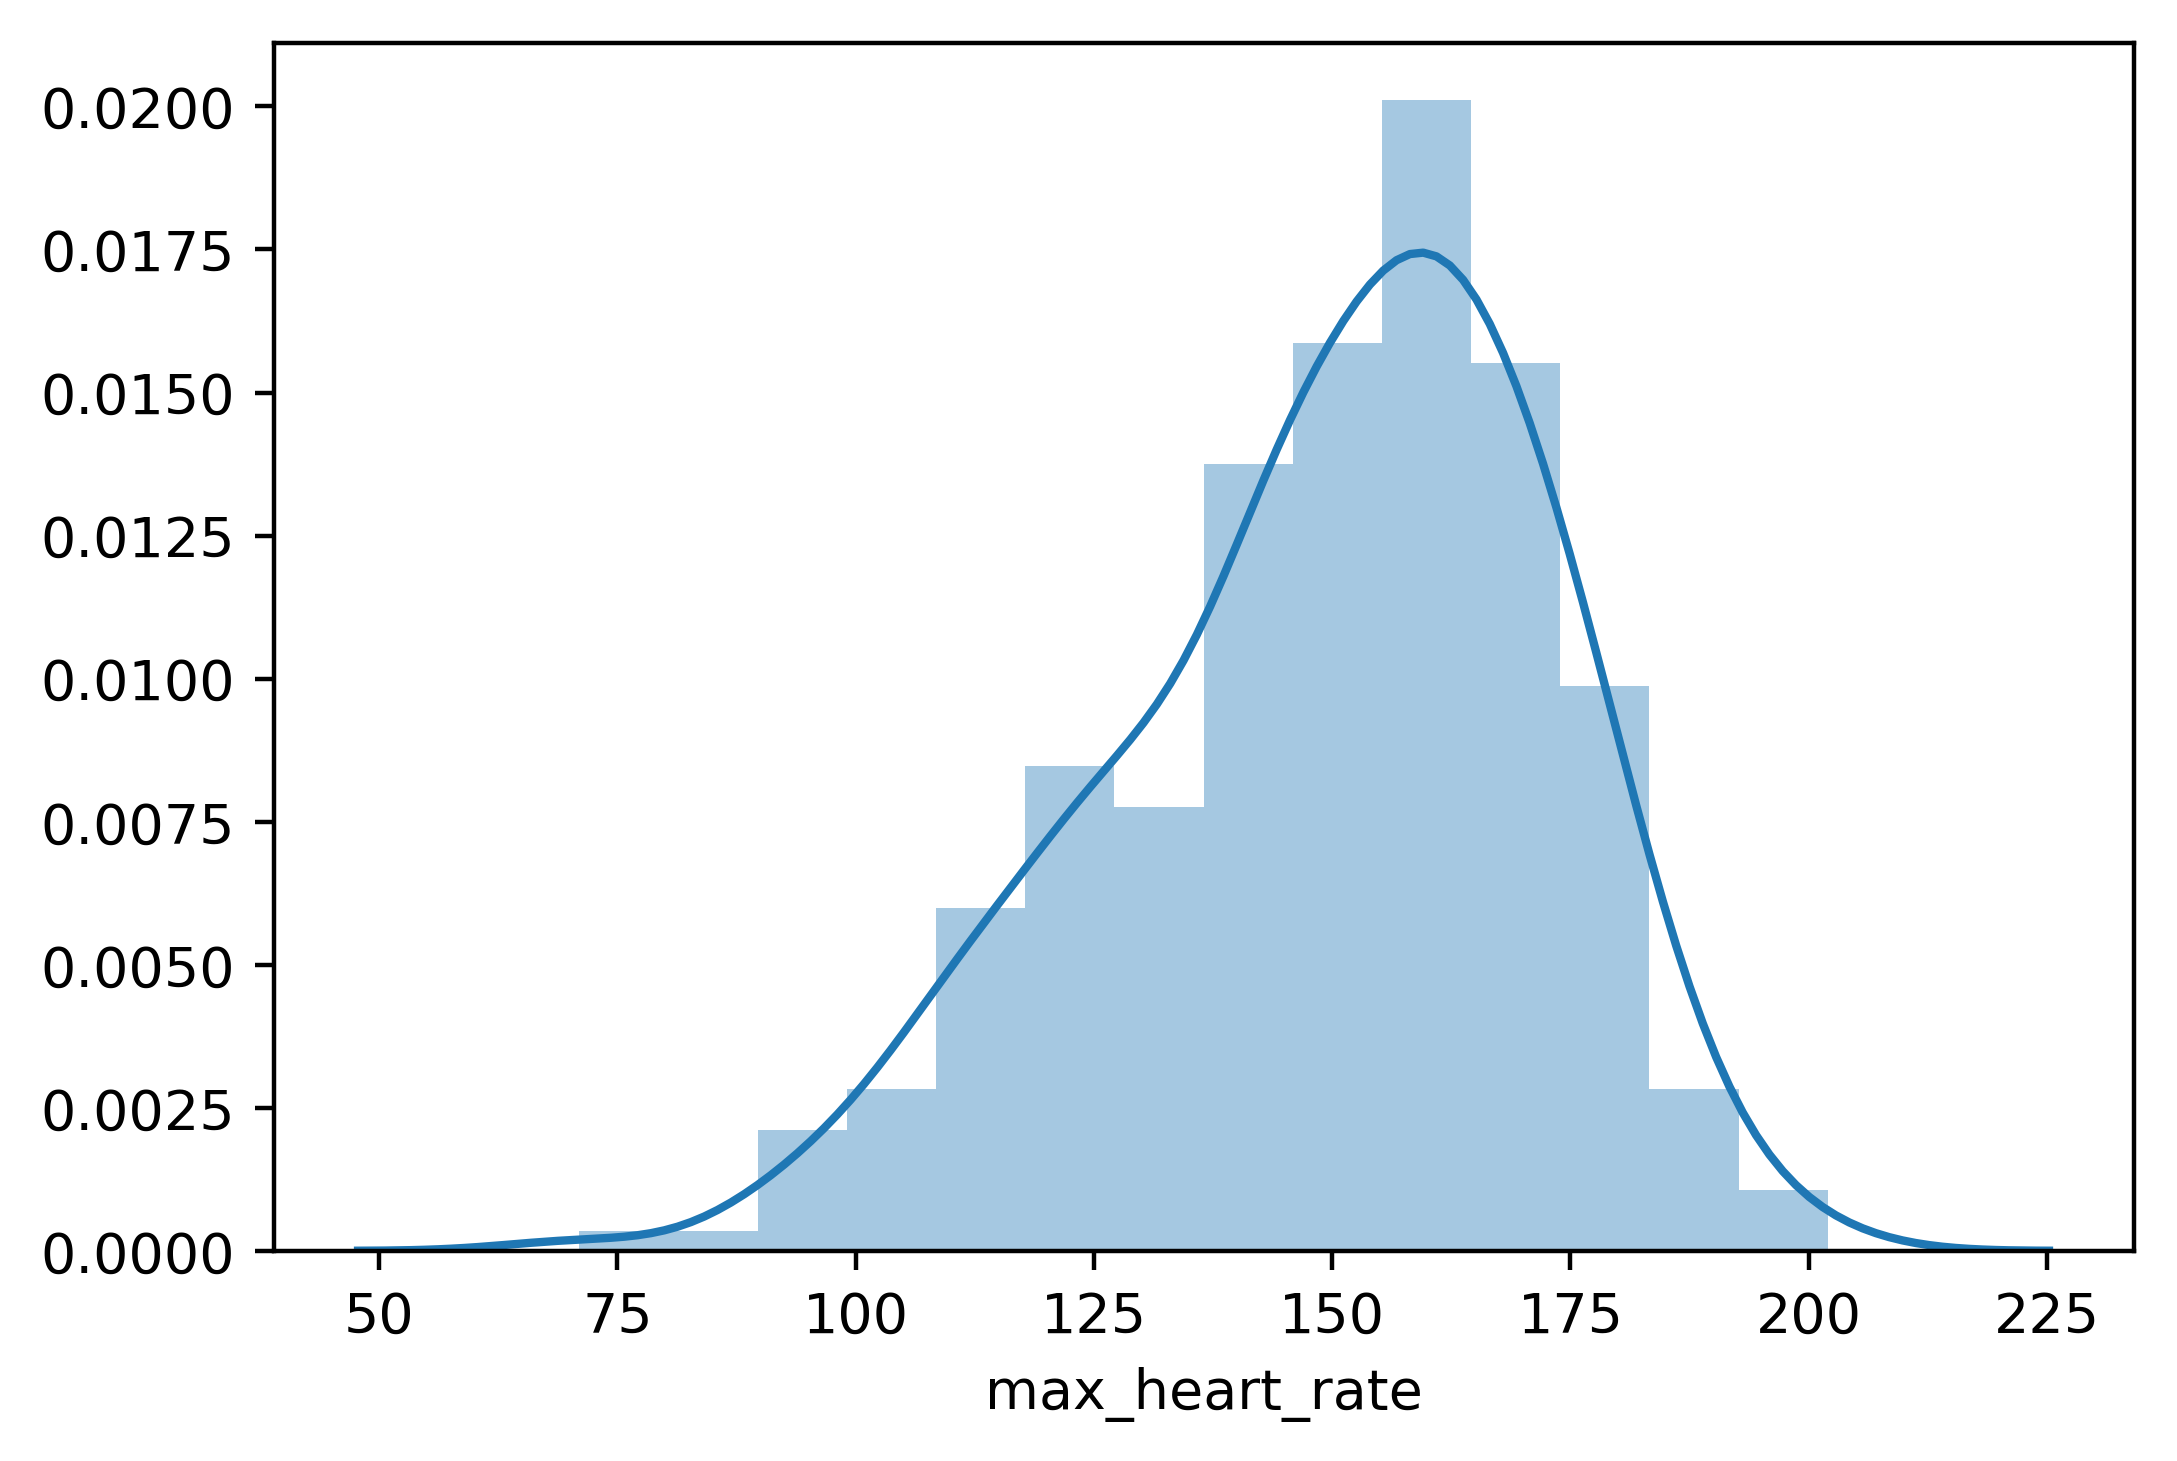

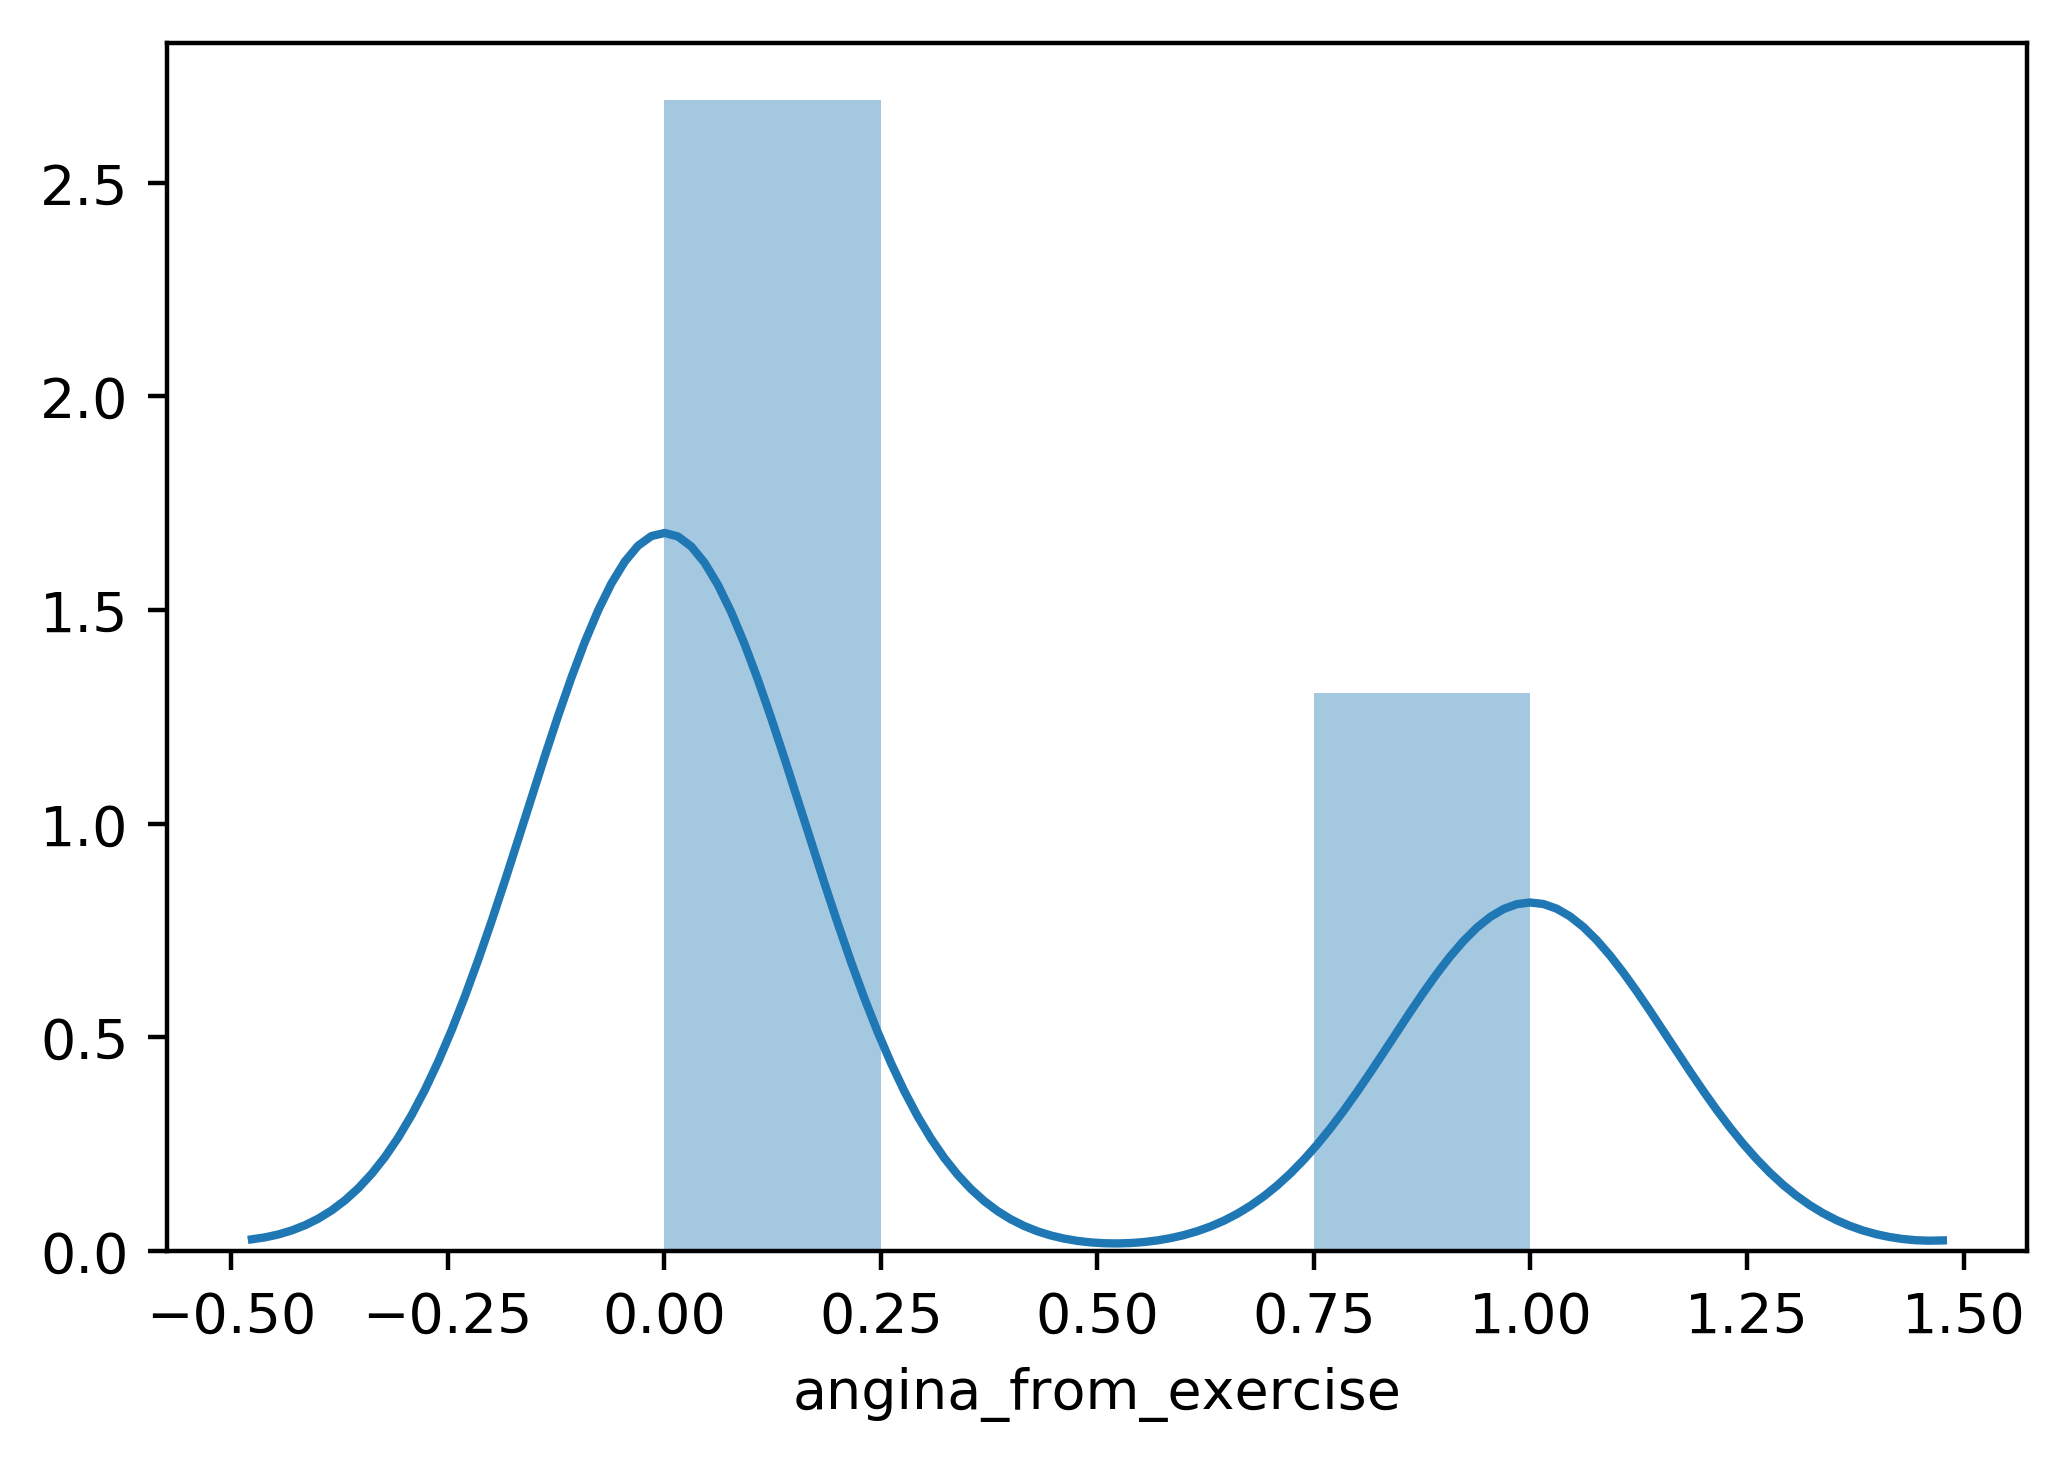

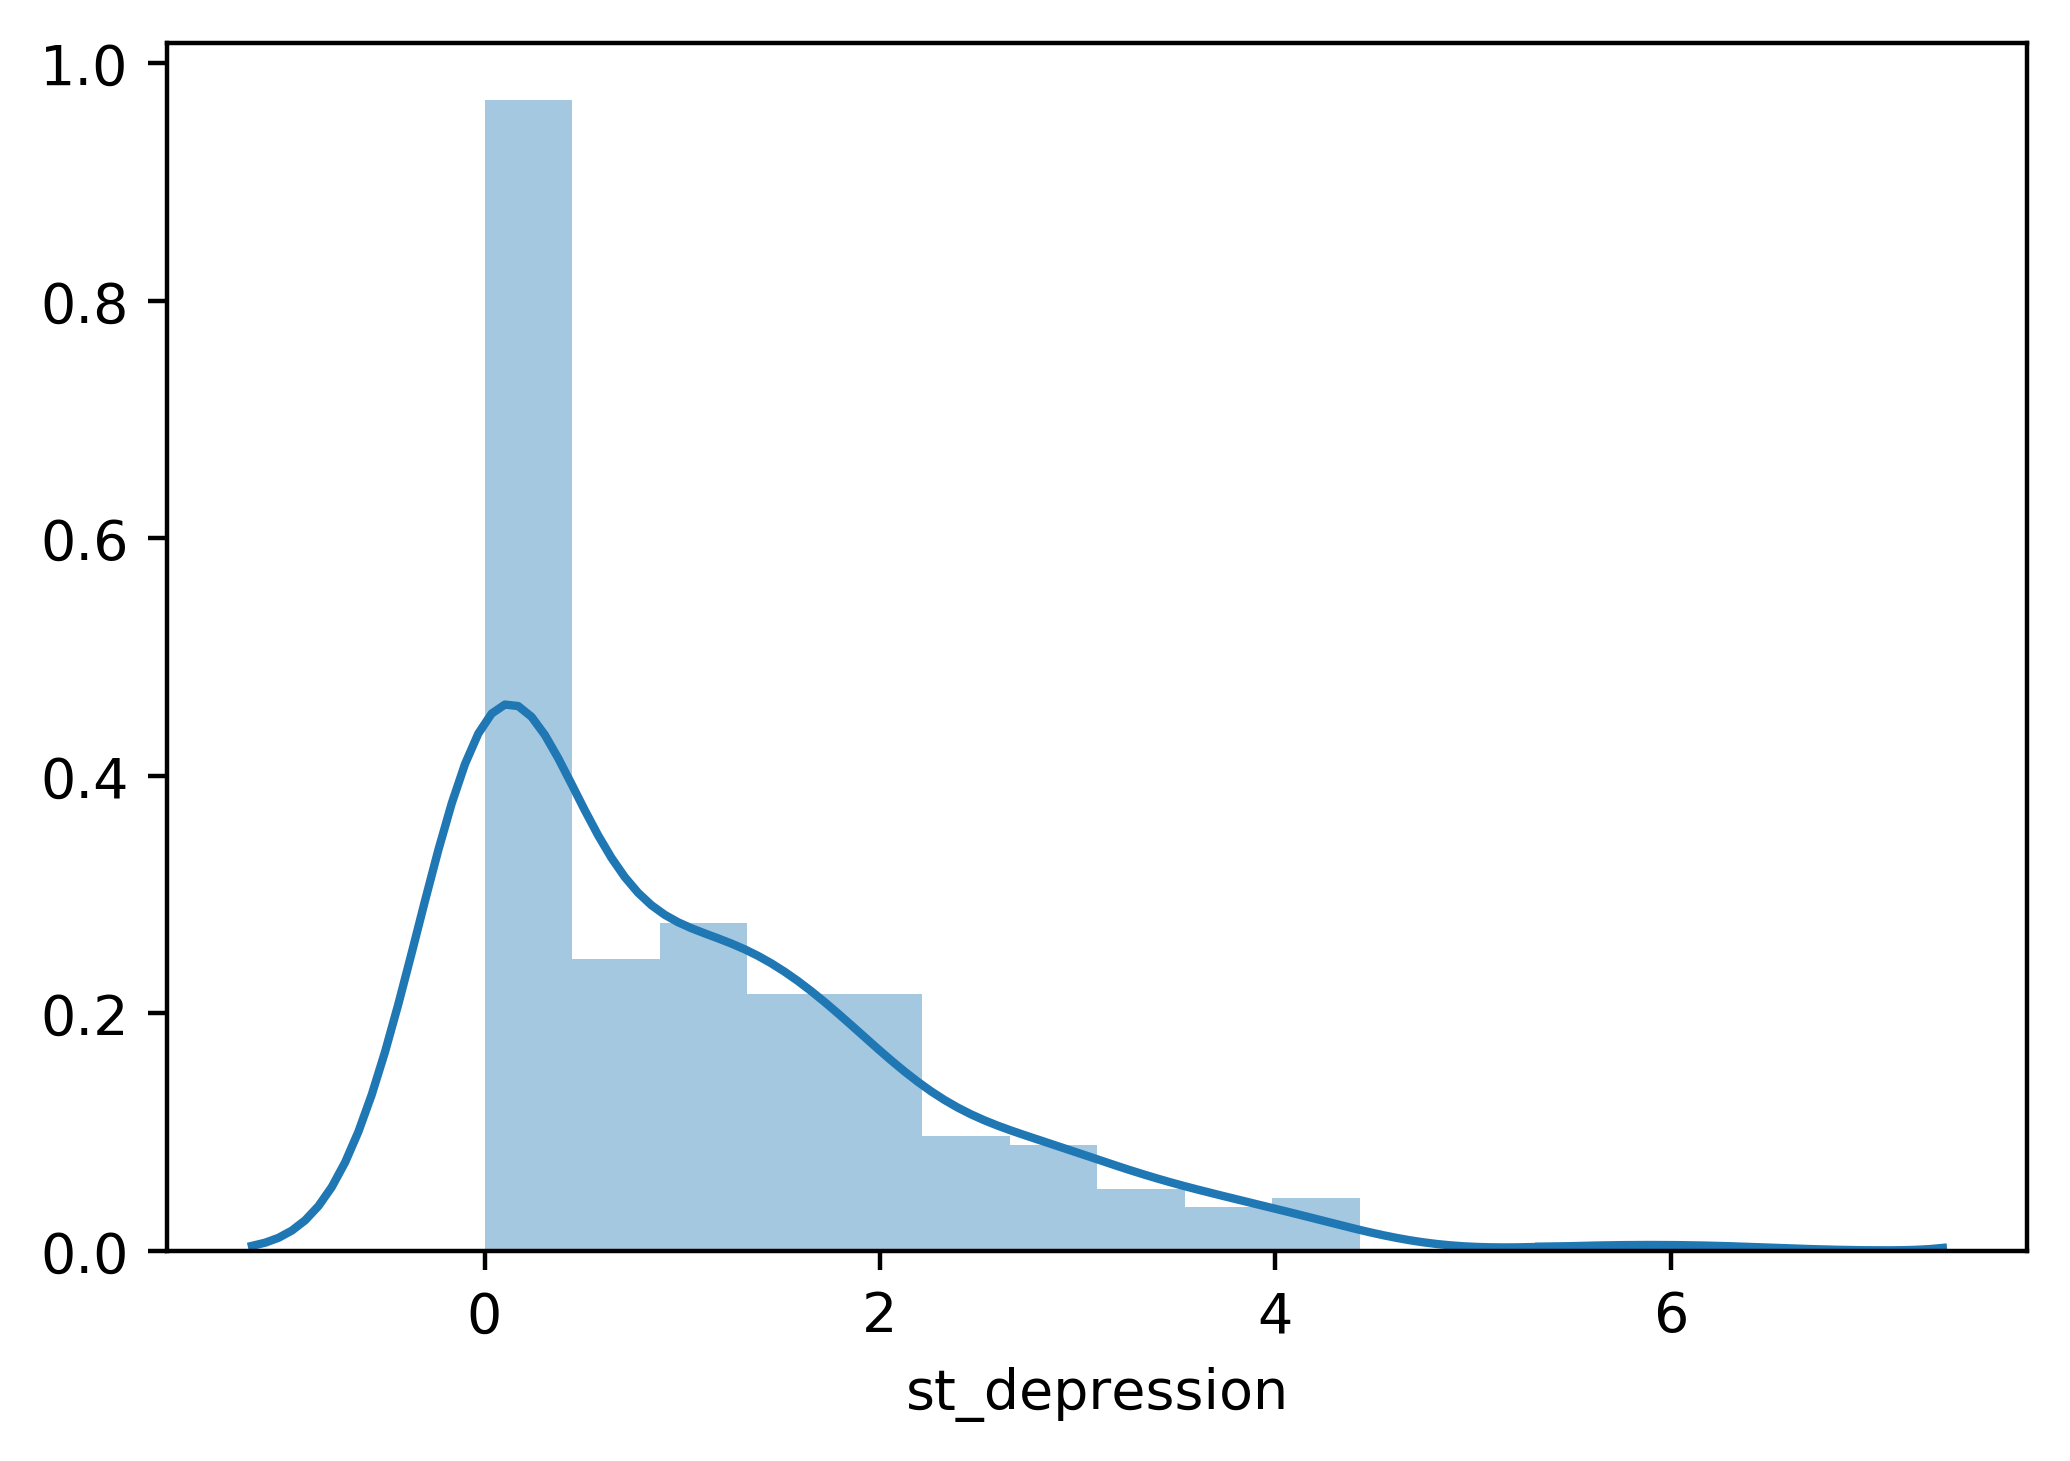

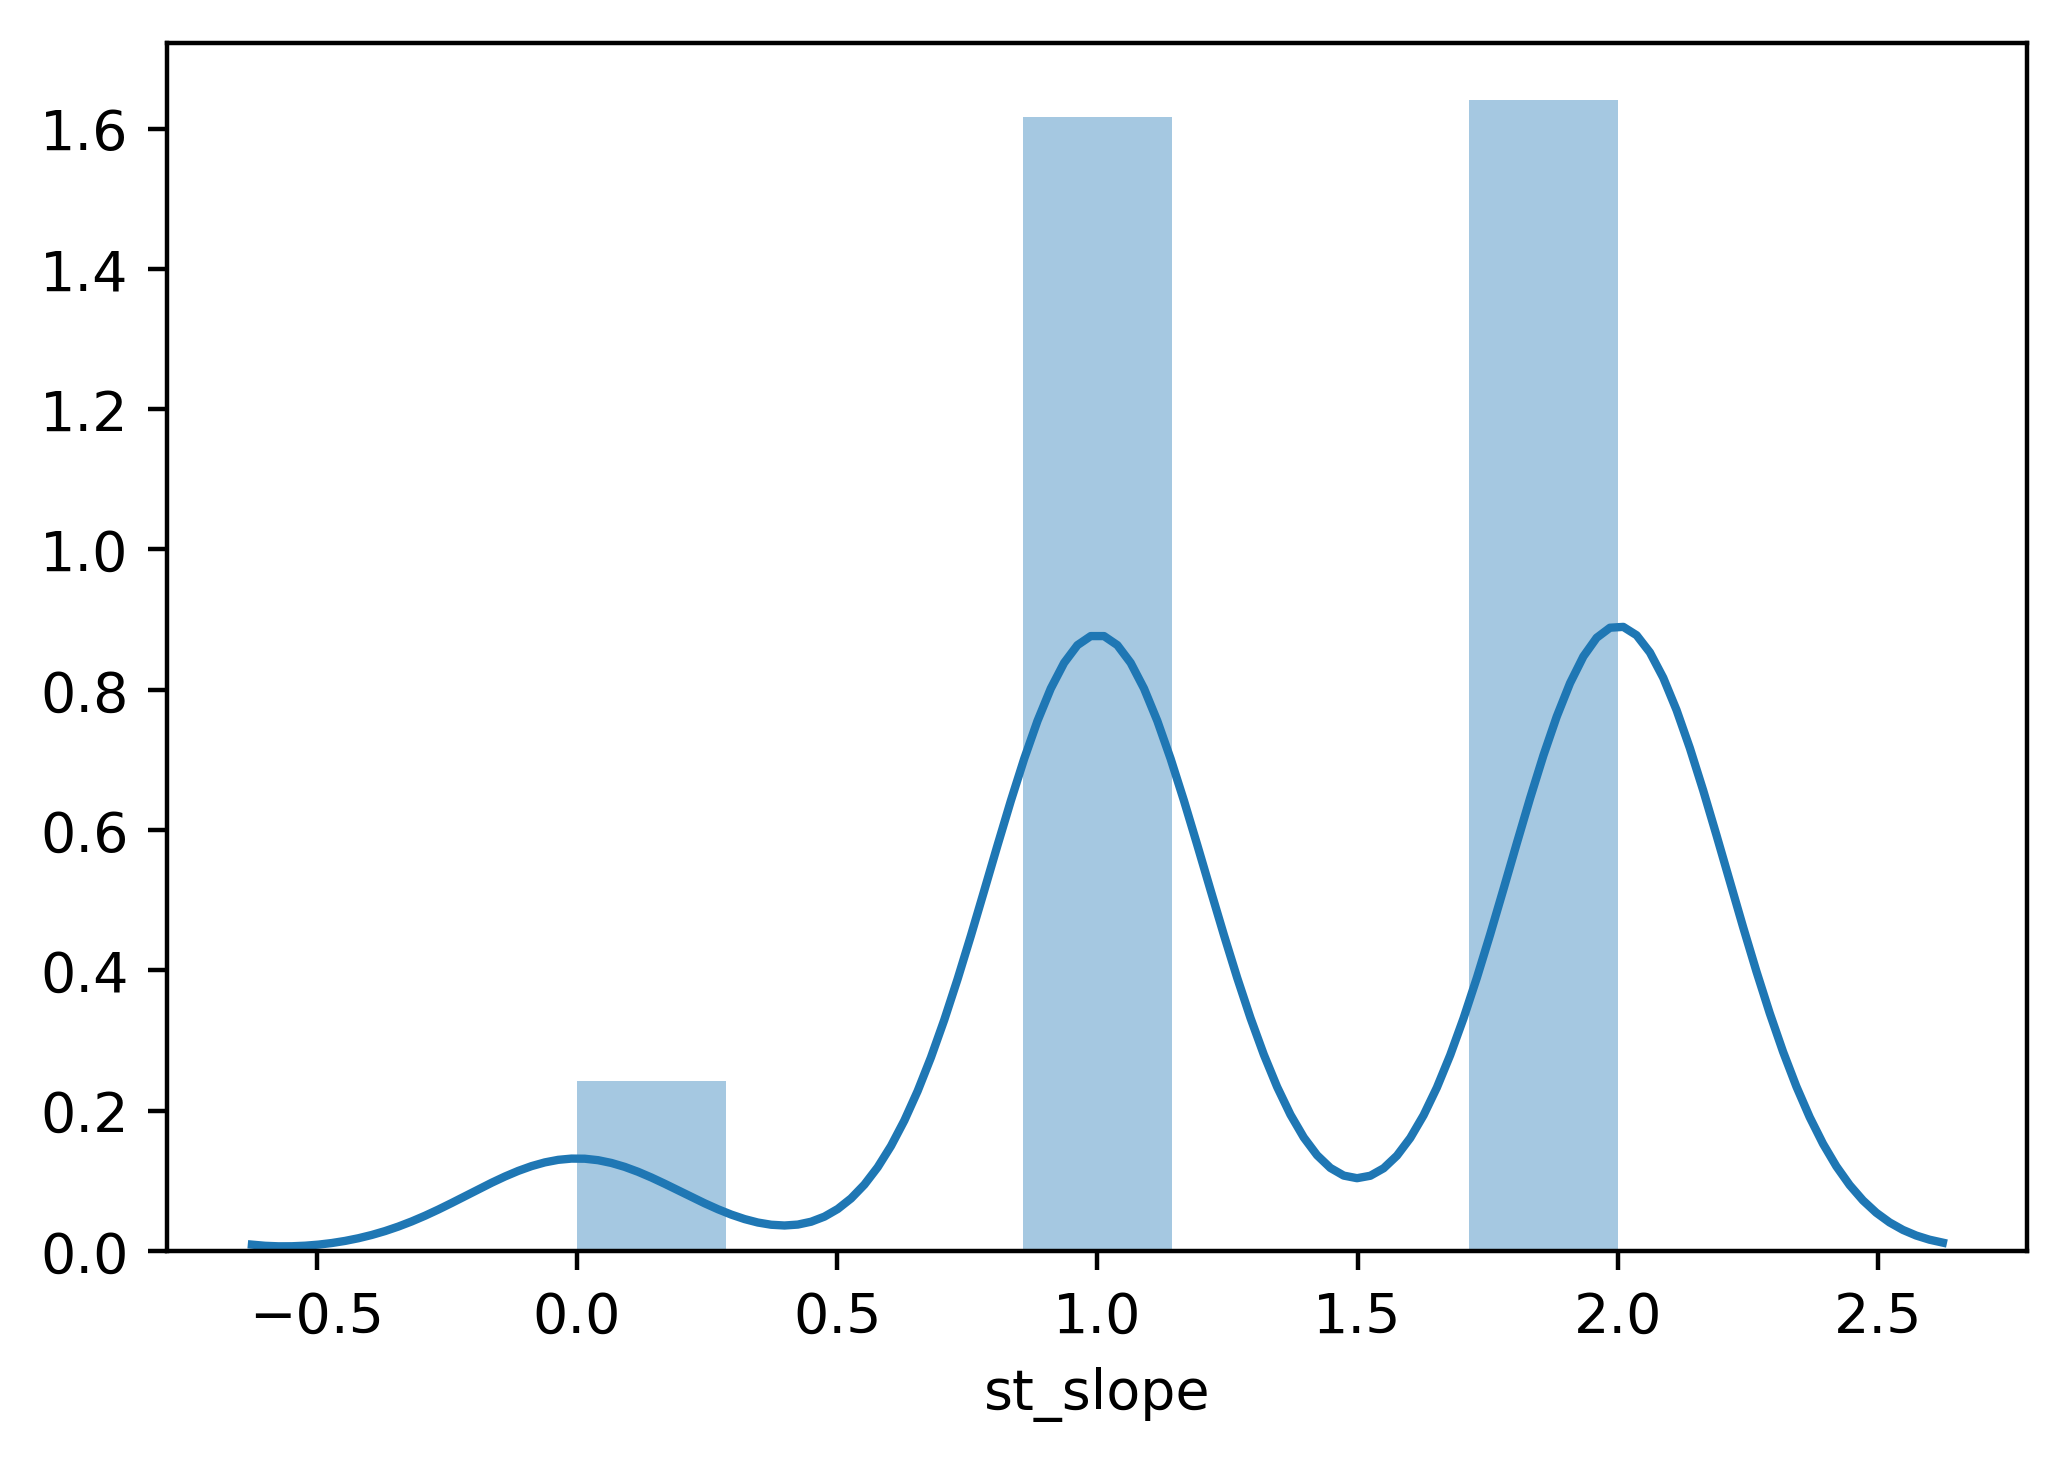

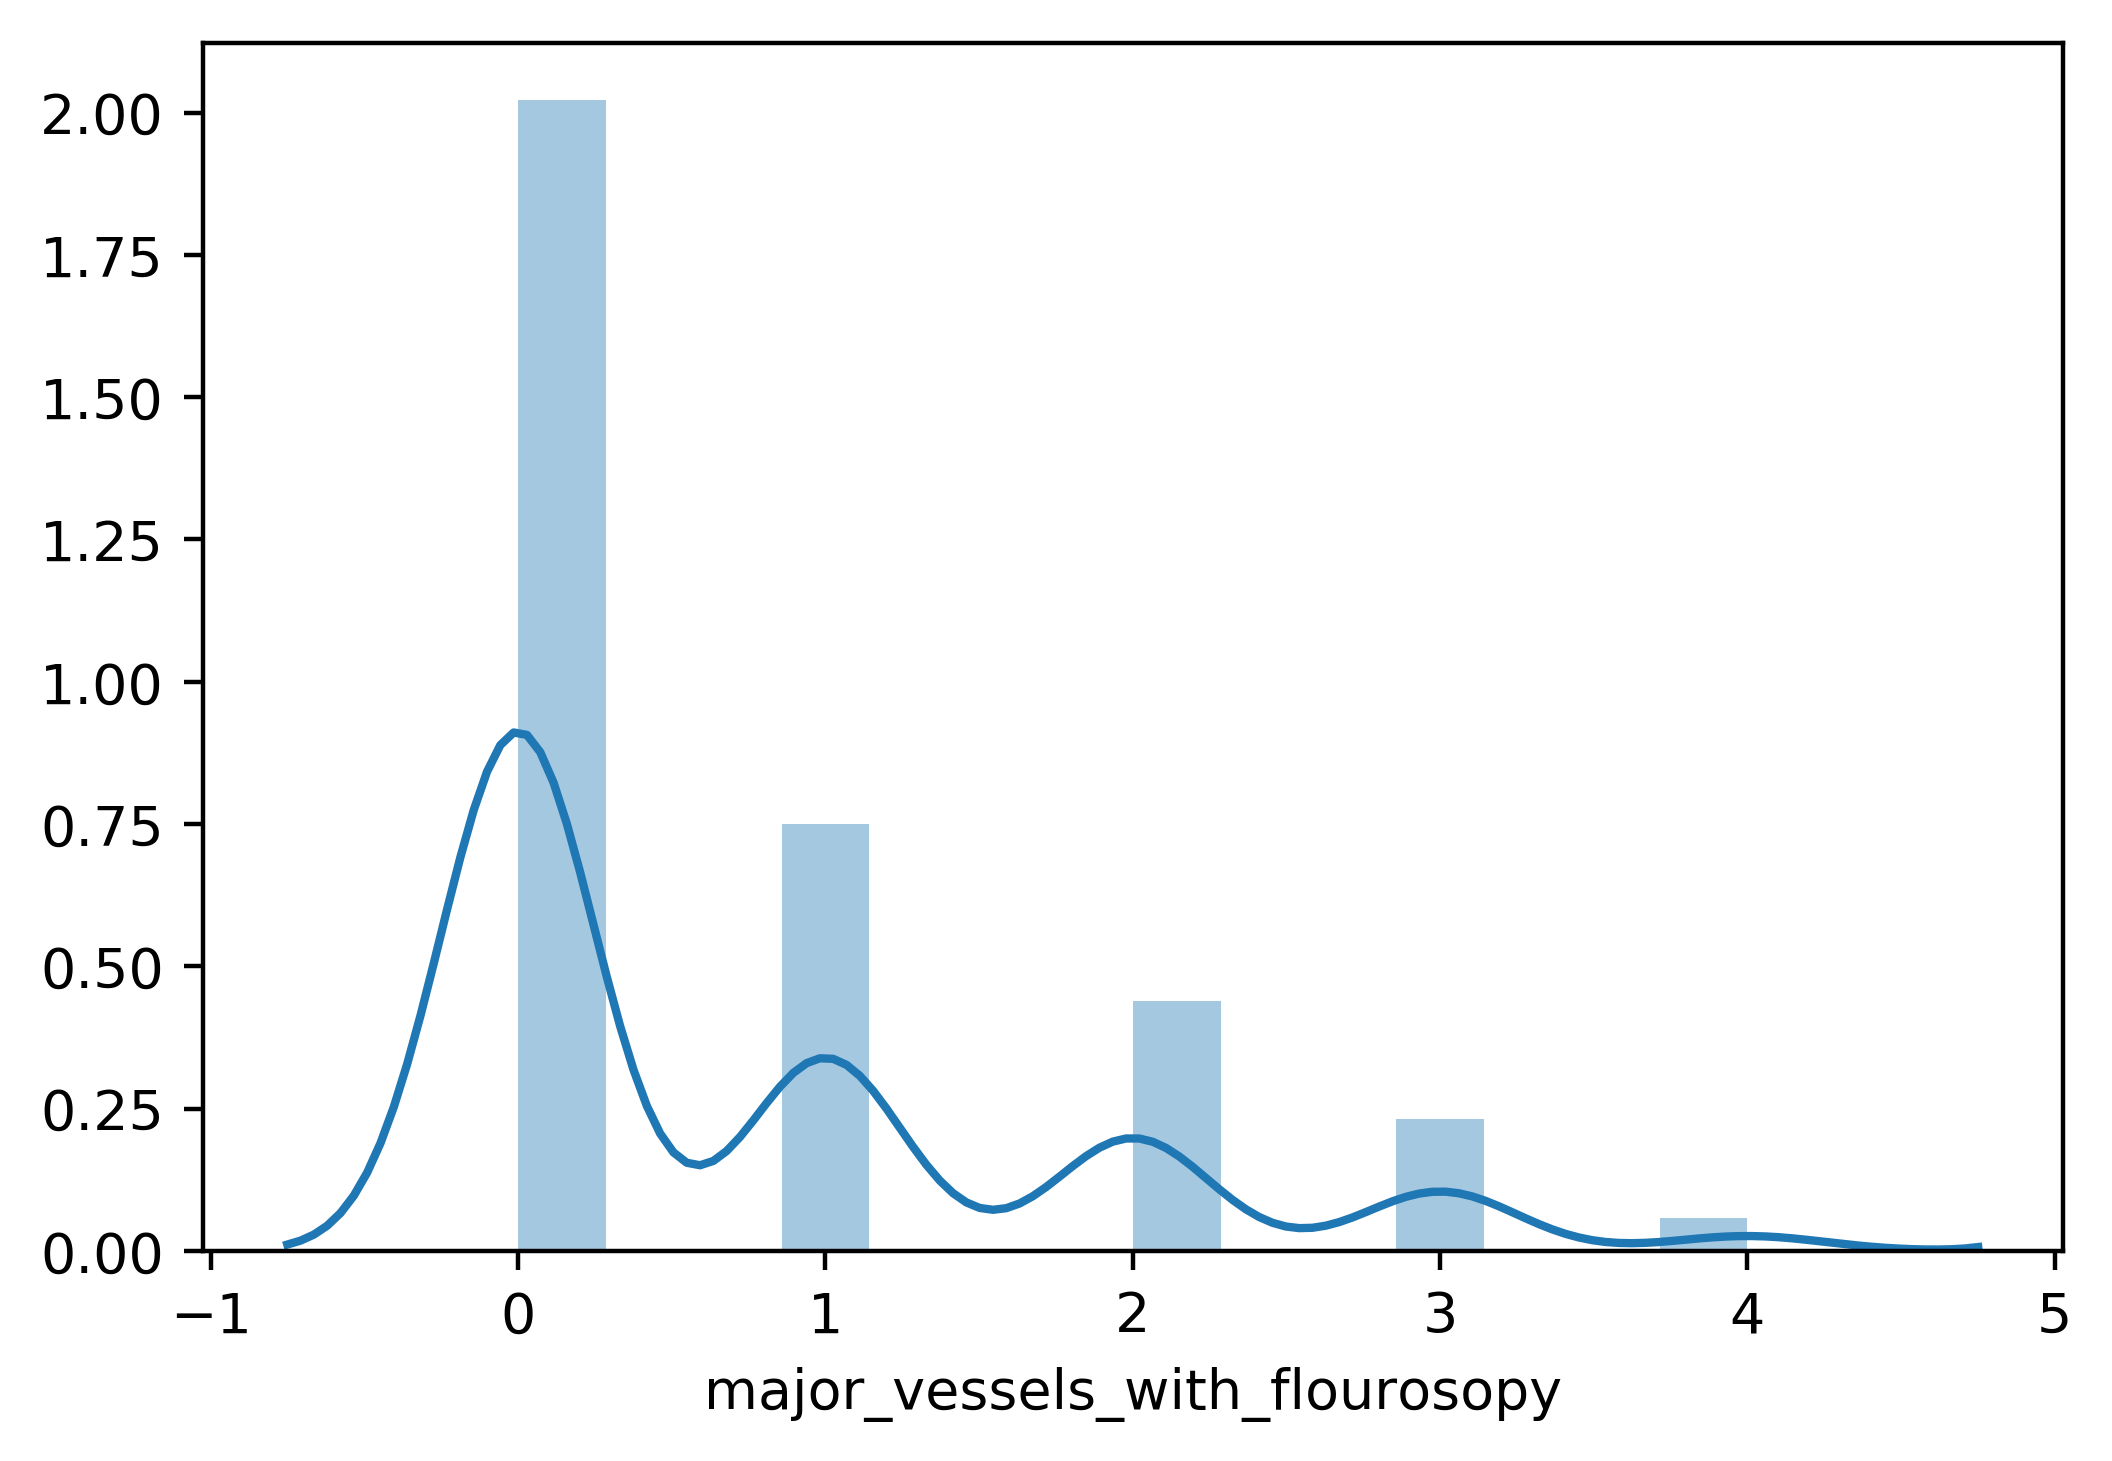

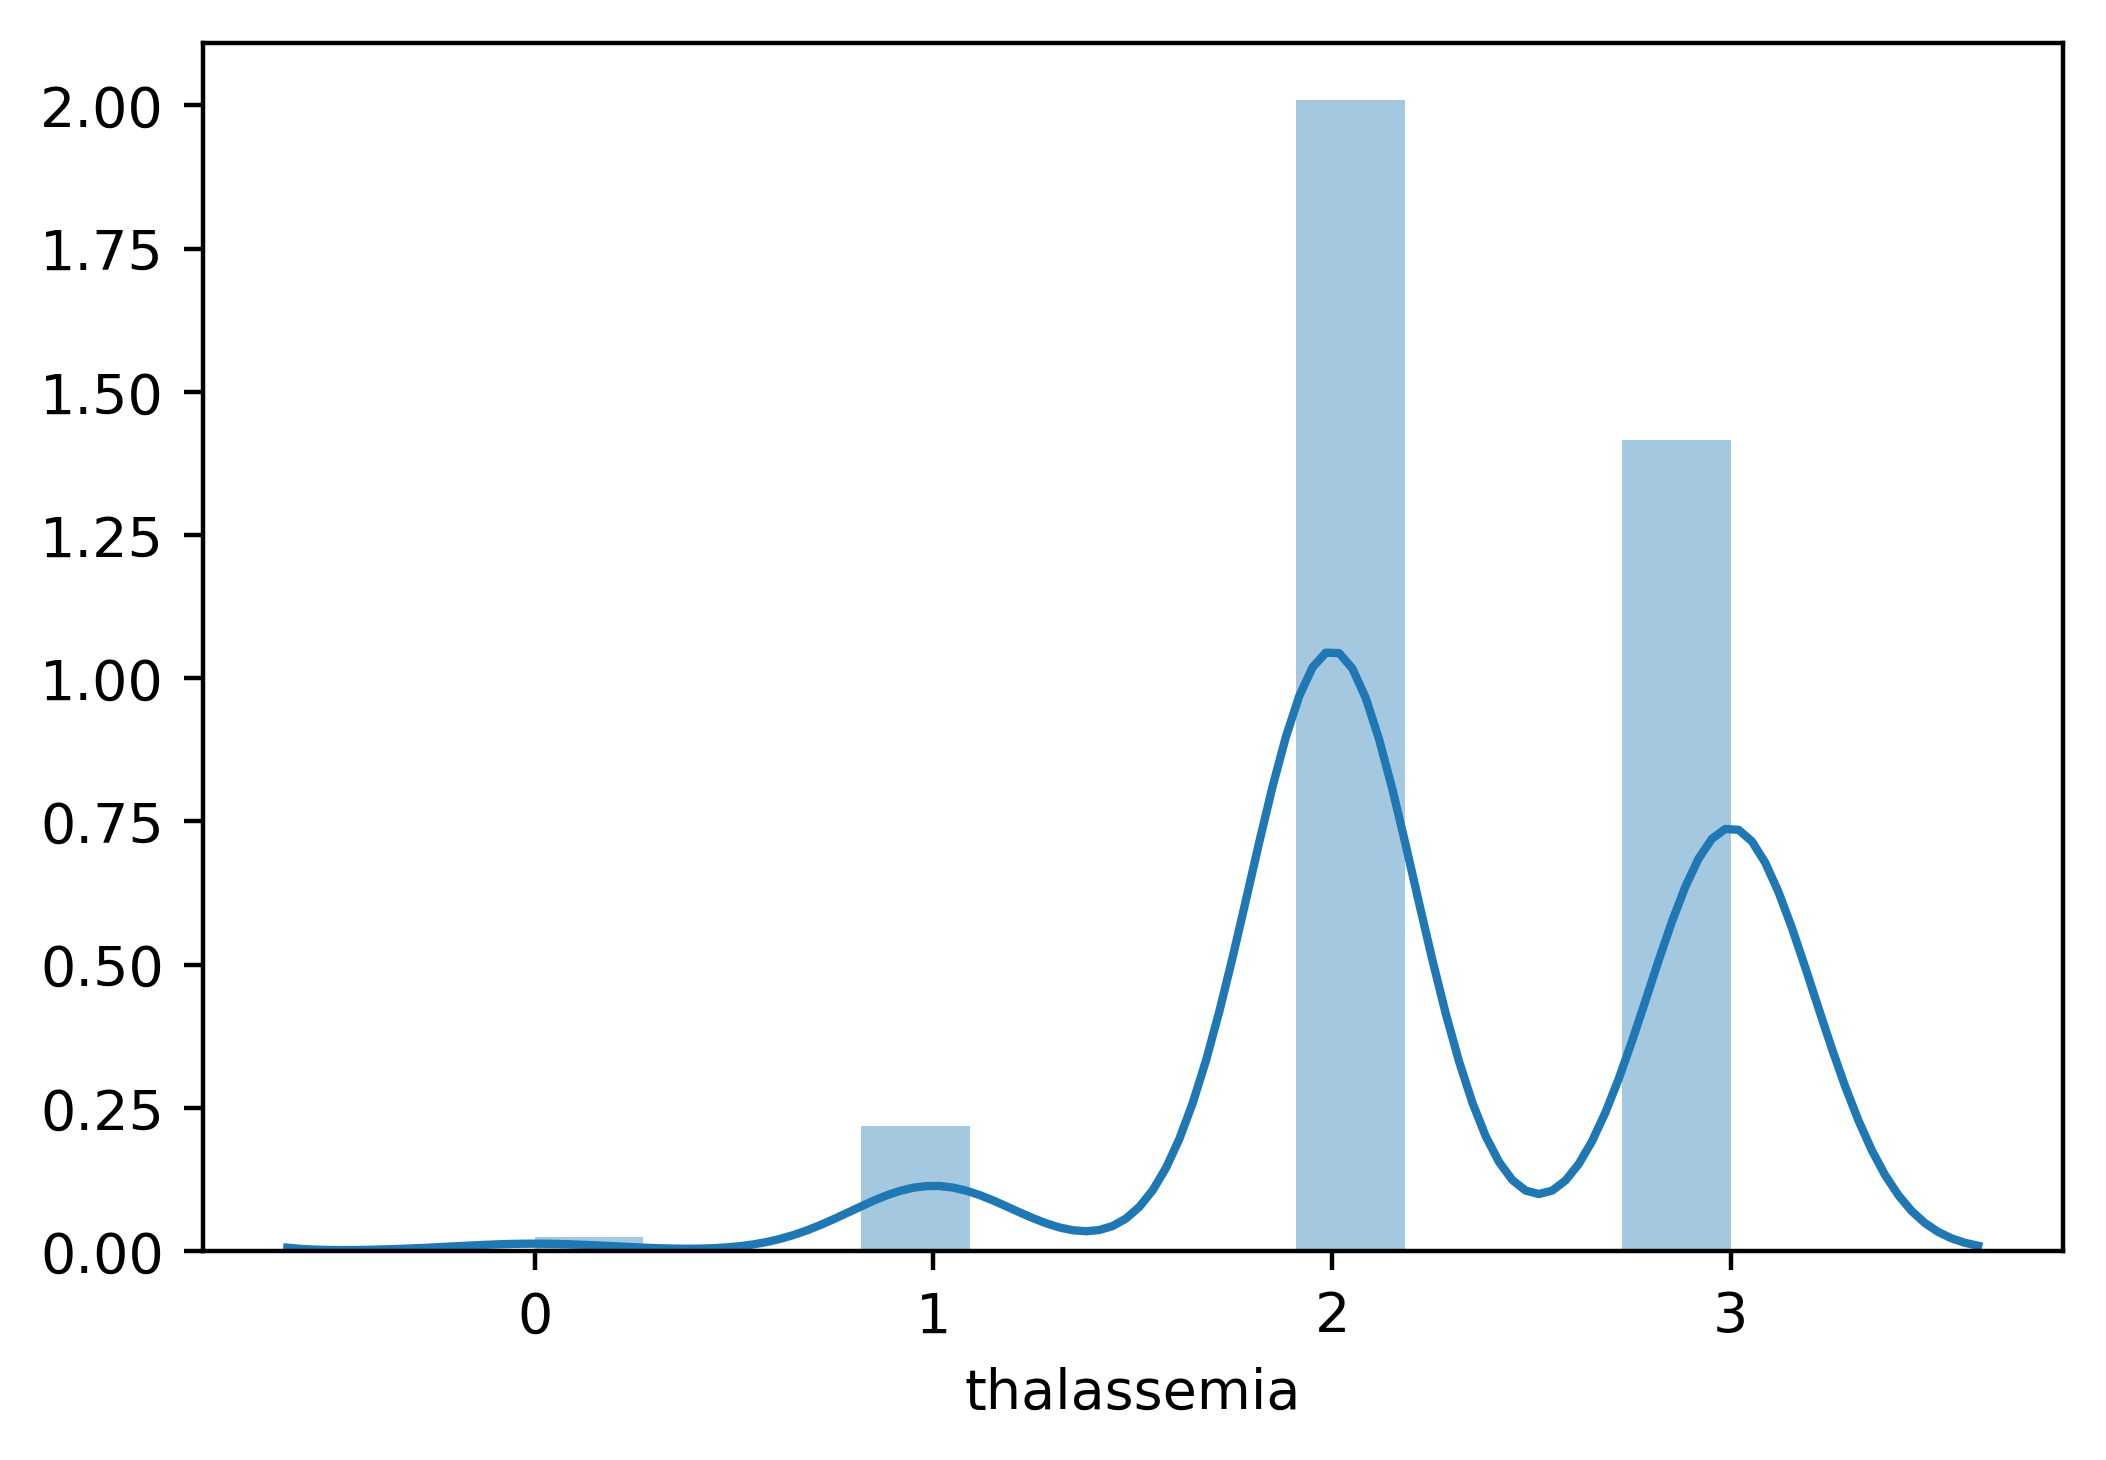

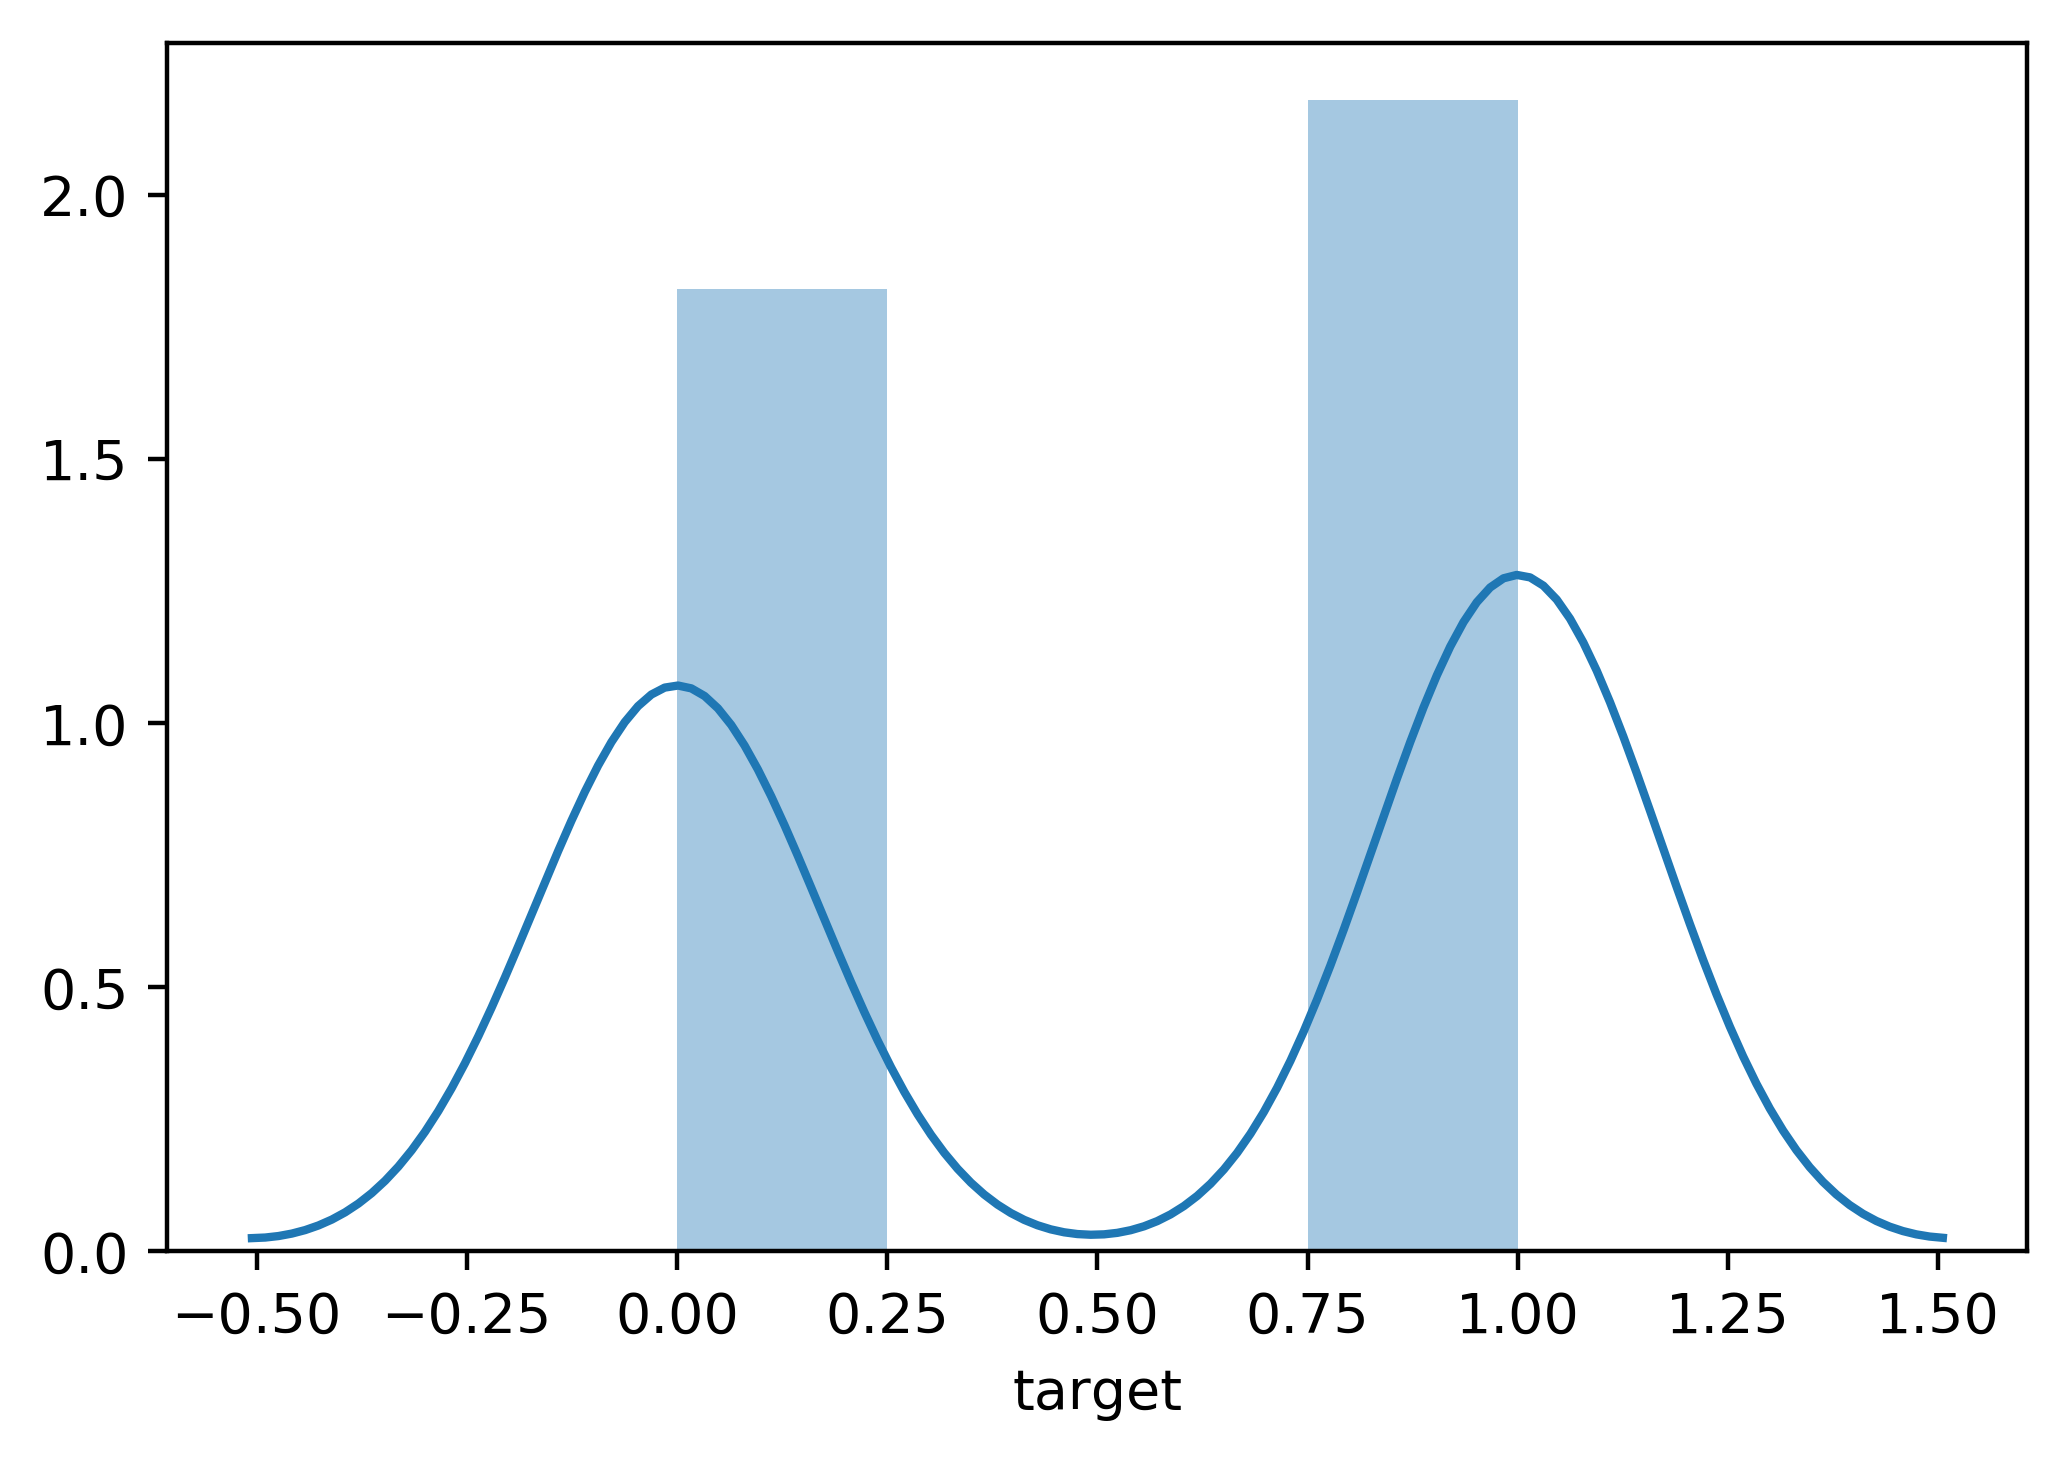

In [7]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

In [8]:
features_response = df.columns.tolist()
features_response

['age',
 'sex',
 'chest_pain',
 'resting_blood_pressure',
 'cholestoral',
 'fasting_blood_sugar',
 'resting_ECG',
 'max_heart_rate',
 'angina_from_exercise',
 'st_depression',
 'st_slope',
 'major_vessels_with_flourosopy',
 'thalassemia',
 'target']

In [9]:
corr = df[features_response].corr()

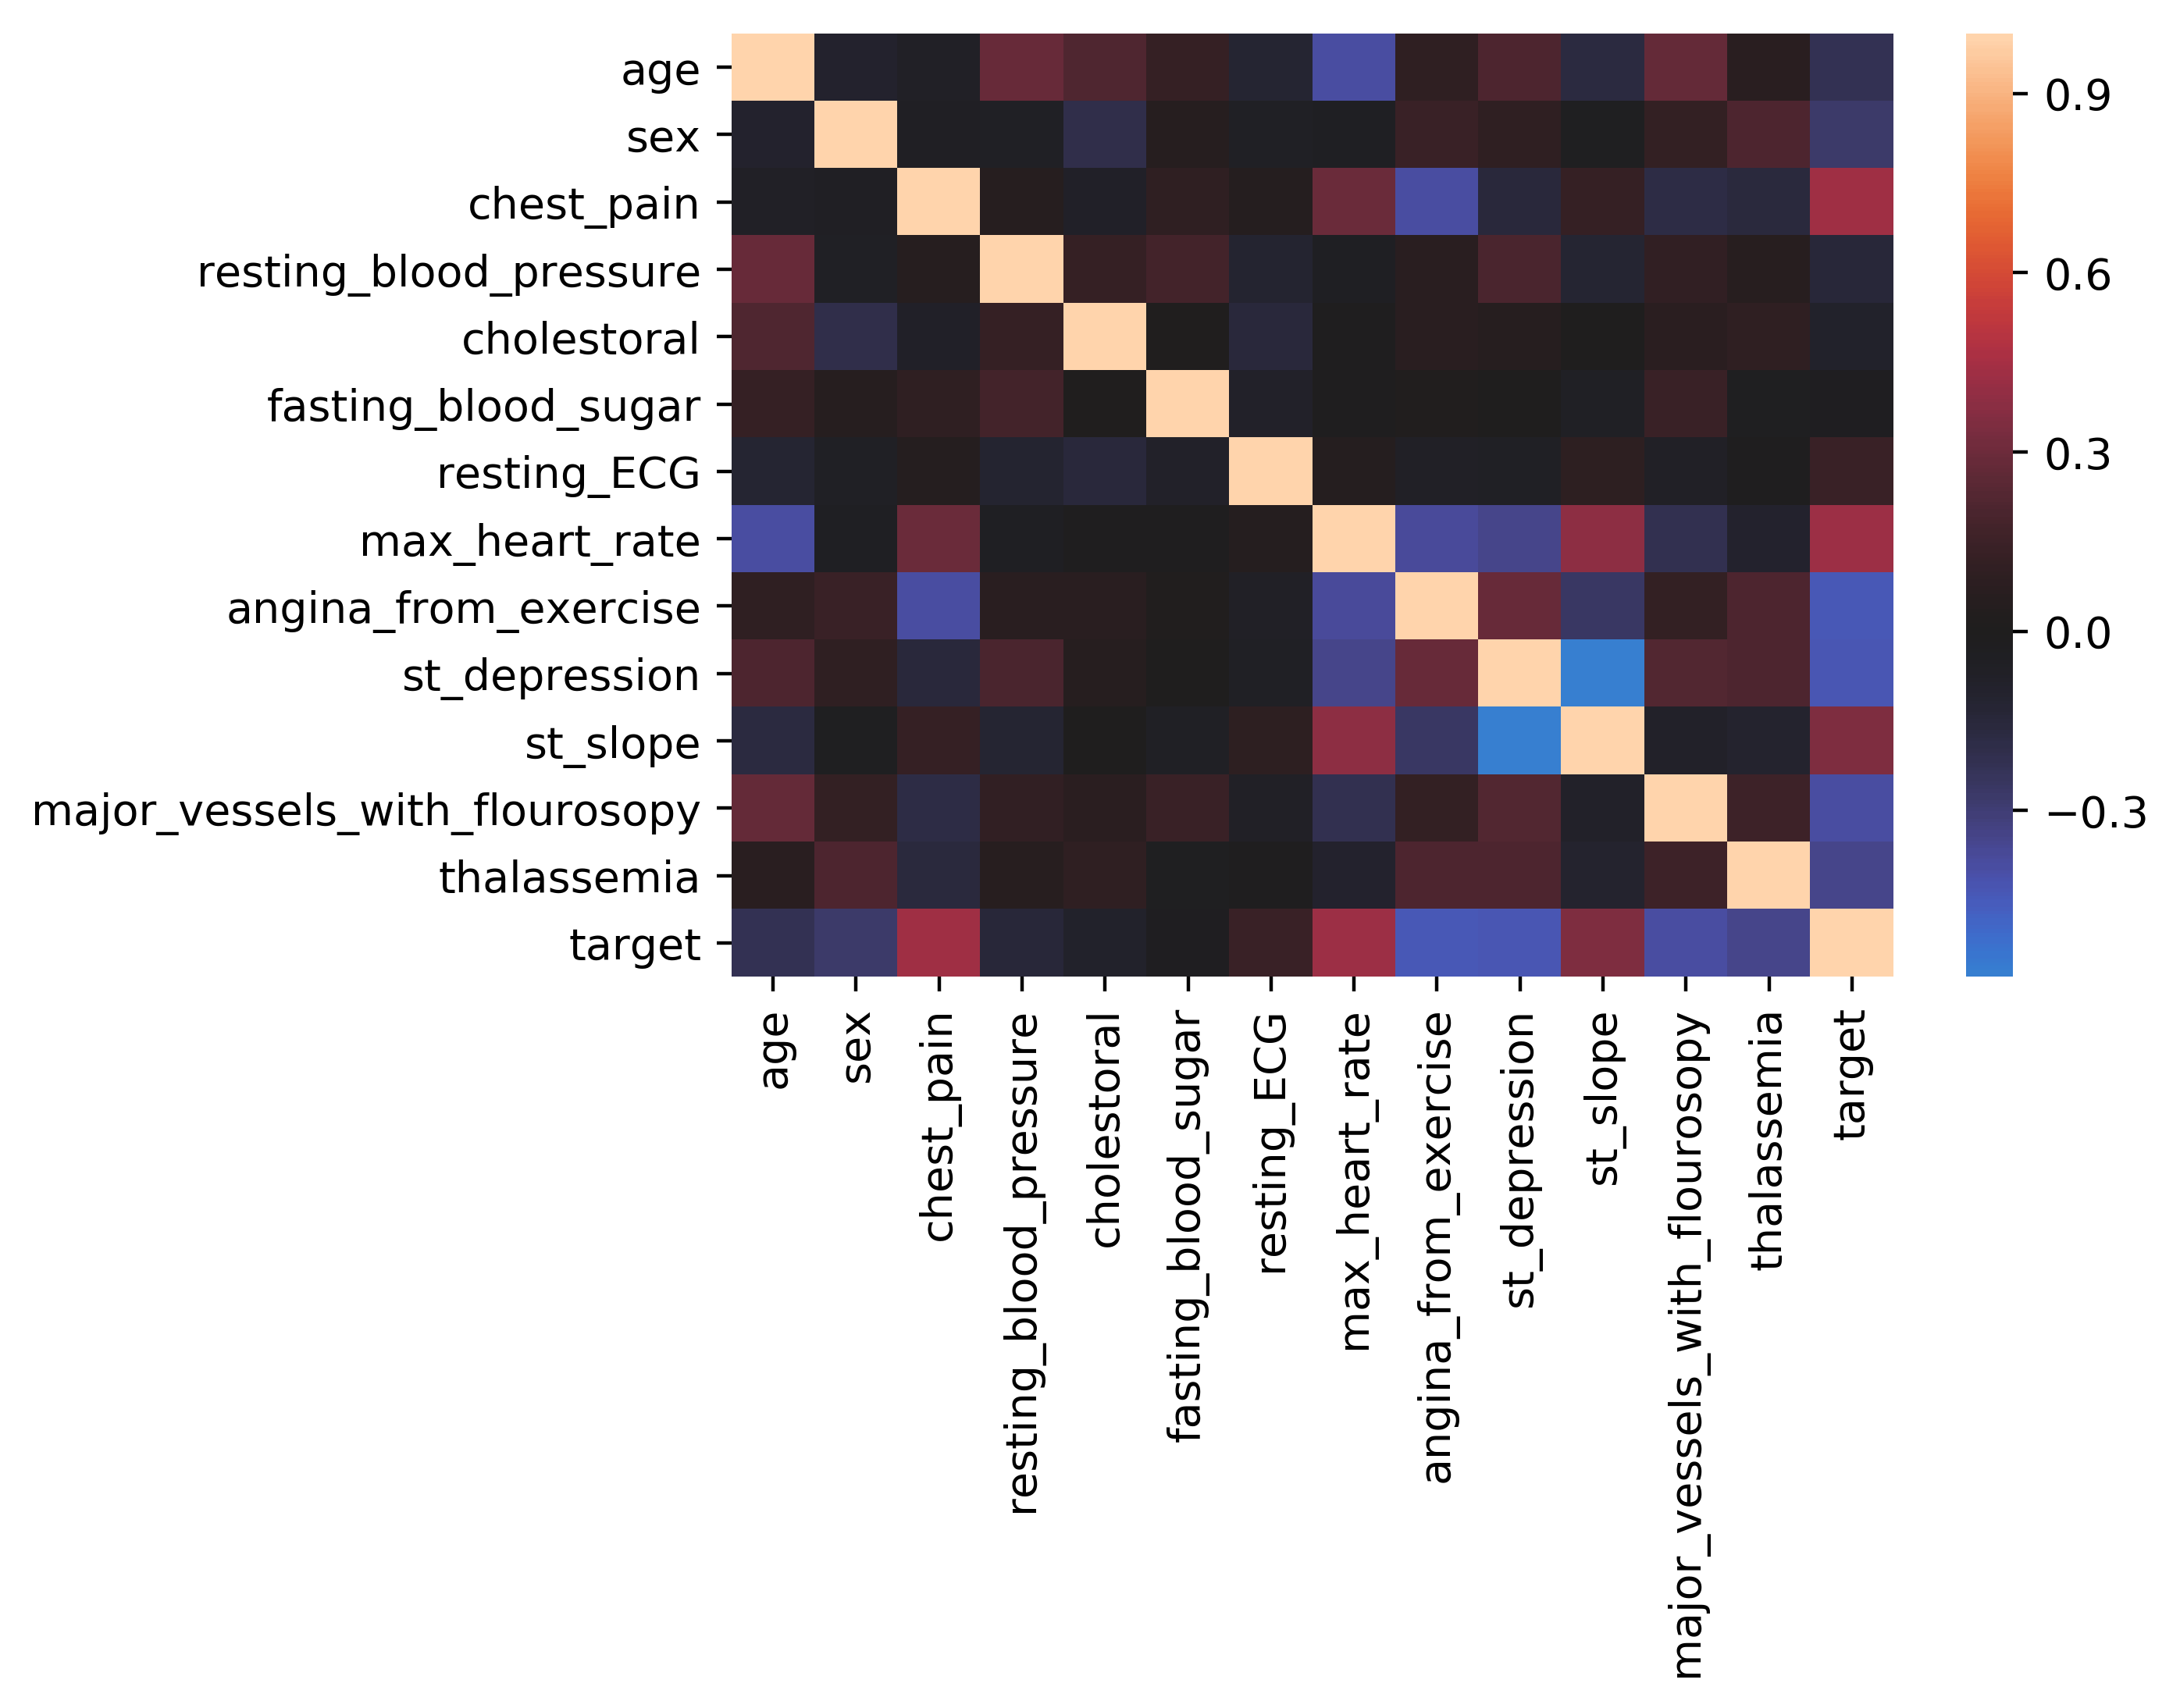

In [10]:
sns.heatmap(corr,xticklabels = corr.columns.values,
           yticklabels = corr.columns.values, center = 0)

In [11]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(303, 13) (303,)


In [12]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X,y)
f_test_df = pd.DataFrame({'Feature': features_response[:-1],
                         'F statistic': f_stat,
                         'p value': f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
8,angina_from_exercise,70.952438,1.520814e-15
2,chest_pain,69.772271,2.469712e-15
9,st_depression,68.551439,4.085346e-15
7,max_heart_rate,65.120104,1.697338e-14
11,major_vessels_with_flourosopy,54.559834,1.491539e-12
10,st_slope,40.902071,6.101611e-10
12,thalassemia,40.407696,7.624880e-10
1,sex,25.792191,6.678692e-07
0,age,16.116700,7.524801e-05
3,resting_blood_pressure,6.458169,1.154606e-02


In [13]:
#Determining the best features from statistics using 80th percentile and above
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile = 20)
selector.fit(X,y)
best_feature_ix = selector.get_support()
best_feature_ix
features = features_response[:-1]
best_features = [features[counter] for counter in range(len(features))
                if best_feature_ix[counter]]
best_features

['chest_pain', 'angina_from_exercise', 'st_depression']

In [14]:
labels = np.array(df['target'])
features = df.drop('target', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [15]:
#Using logisitc regression with 'angina' to determine a heart disease patient or not
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression() #Binary classifier
my_lr.C = 0.1
my_lr.solver = 'liblinear'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['angina_from_exercise'].values.reshape(-1,1), df['target'].values, test_size =0.2, random_state=24)
print('The mean values of the train predictions are {}, \nThe mean values of the testing predictions are {}.'.format(np.mean(y_train), np.mean(y_test)))

The mean values of the train predictions are 0.5495867768595041, 
The mean values of the testing predictions are 0.5245901639344263.


In [16]:
my_lr.fit(X_train, y_train)
y_pred = my_lr.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7377049180327869

In [17]:
metrics.confusion_matrix(y_test, y_pred)

array([[14, 15],
       [ 1, 31]])

Text(0.5, 1.0, 'ROC curve')

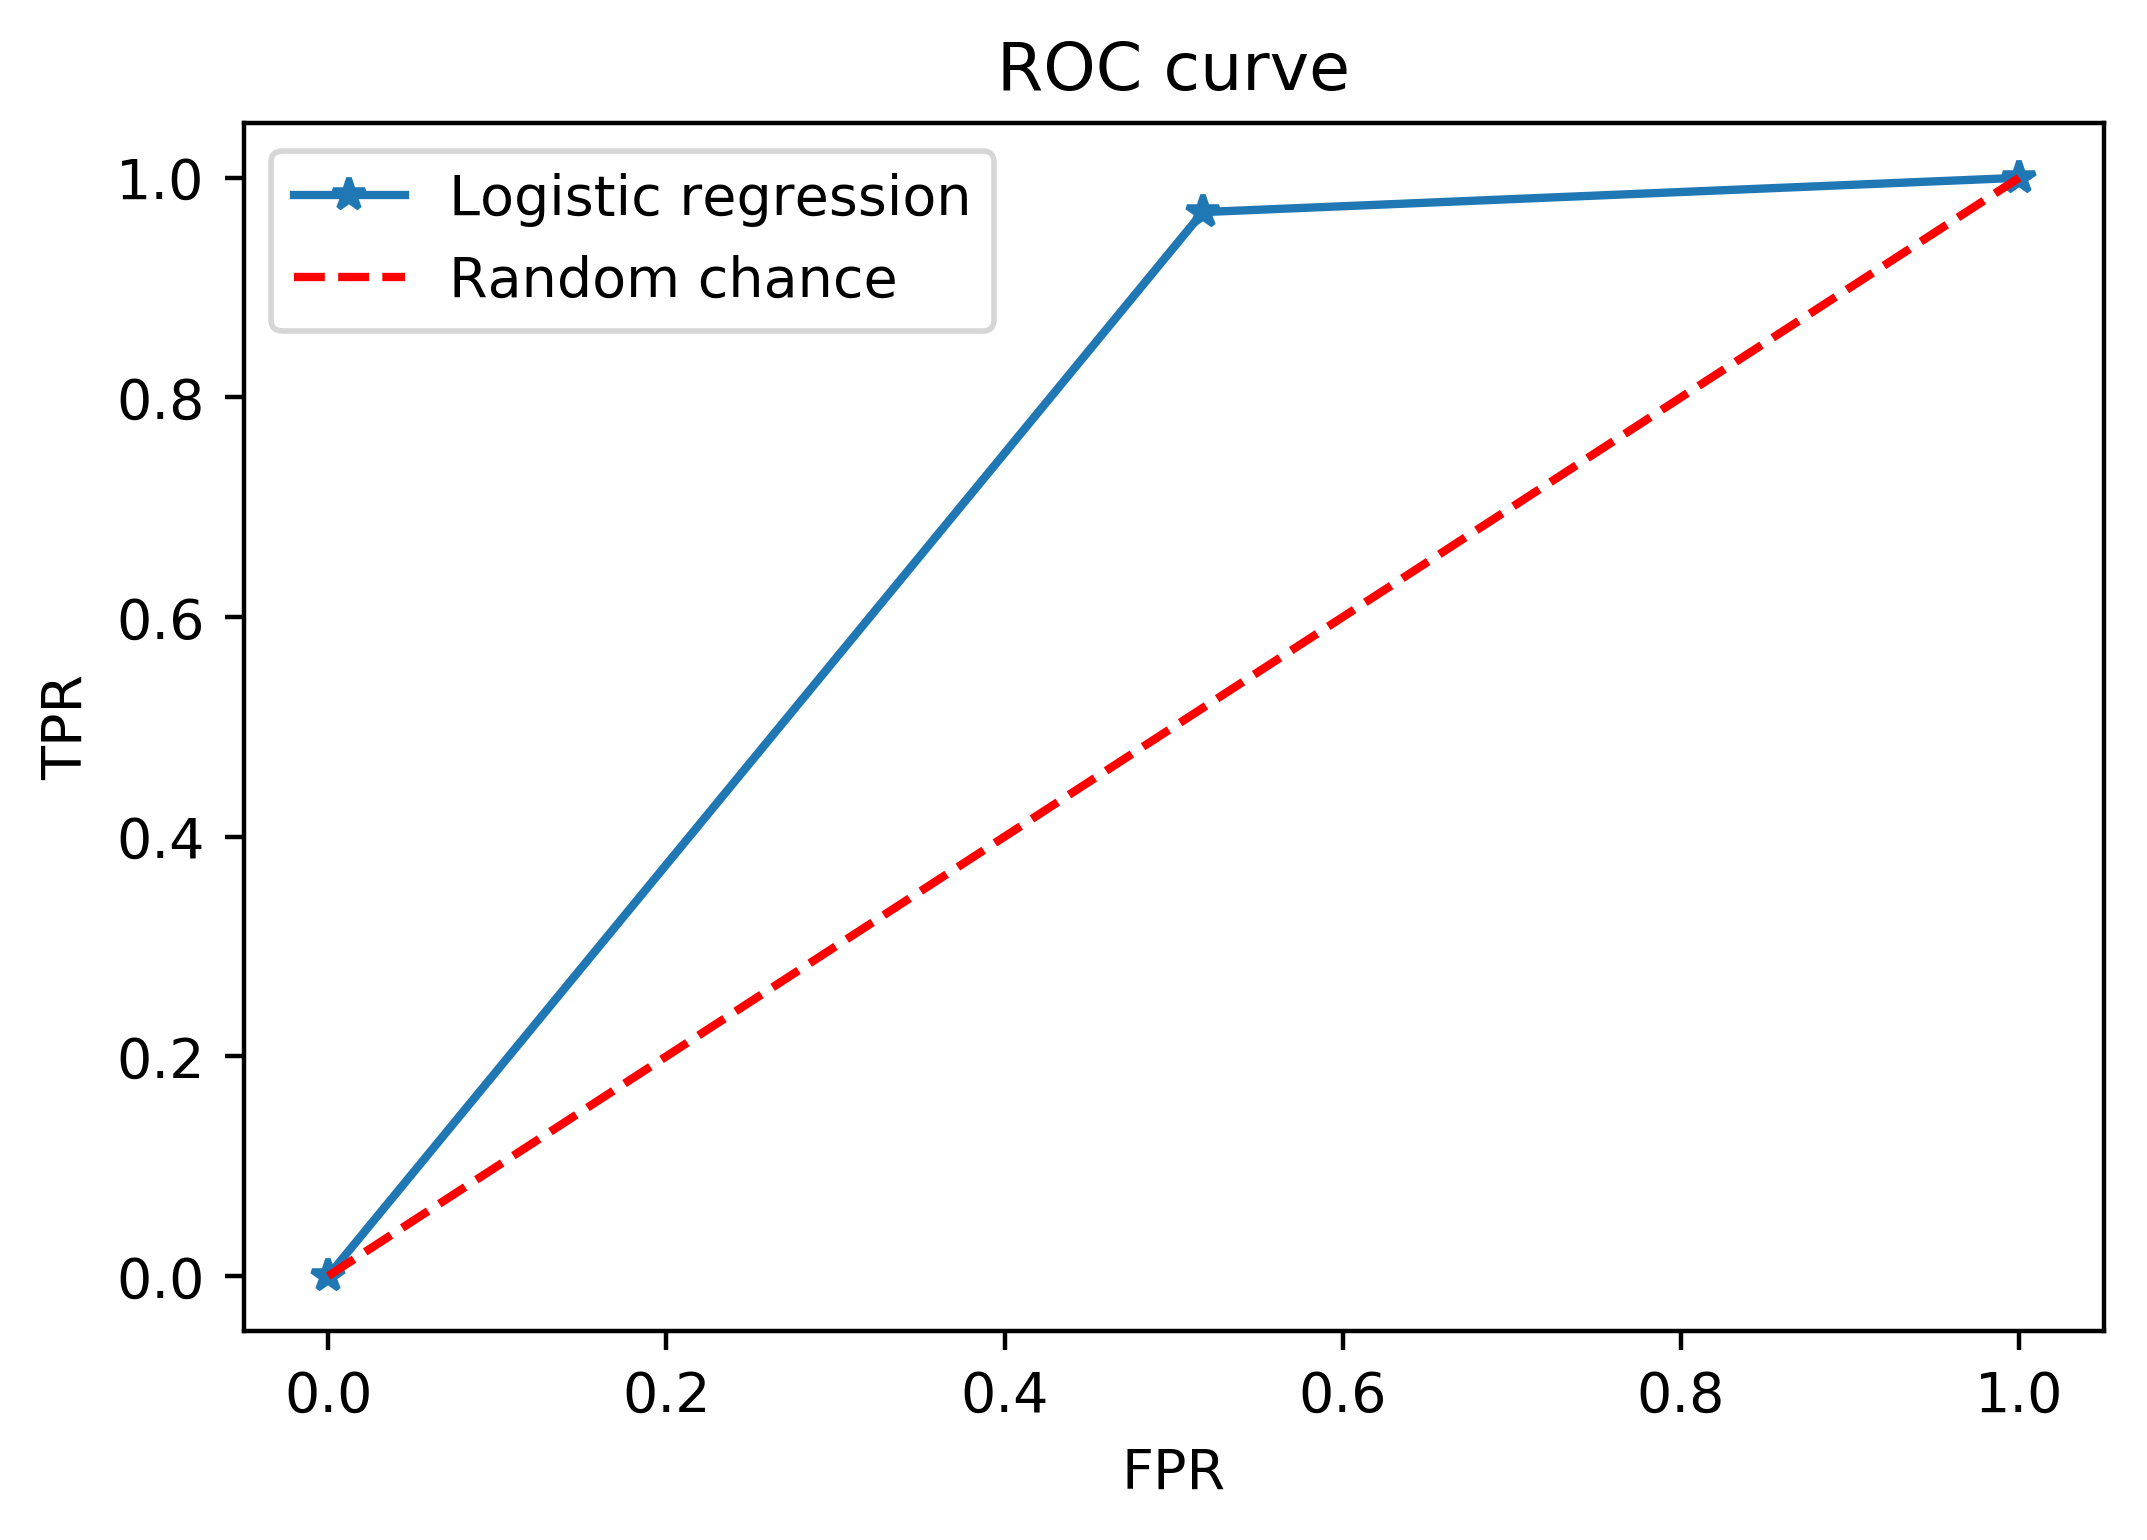

In [18]:
y_pred_proba = my_lr.predict_proba(X_test) #obtaining predicted probabilites
pos_proba = y_pred_proba[:,1] #putting second column of predicted probabilites into an array
#plot an roc auc curve
fpr,tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression','Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [19]:
metrics.roc_auc_score(y_test, pos_proba)

0.7257543103448276

**Creating the decision tree**

In [20]:
#Using a decision tree classifier to decide variable importance
from sklearn.model_selection import train_test_split
from sklearn import tree
XA_train, XA_test, ya_train, ya_test = \
train_test_split(df[features_response[:-1]].values, df['target'].values, 
                test_size=0.2, random_state = 24)

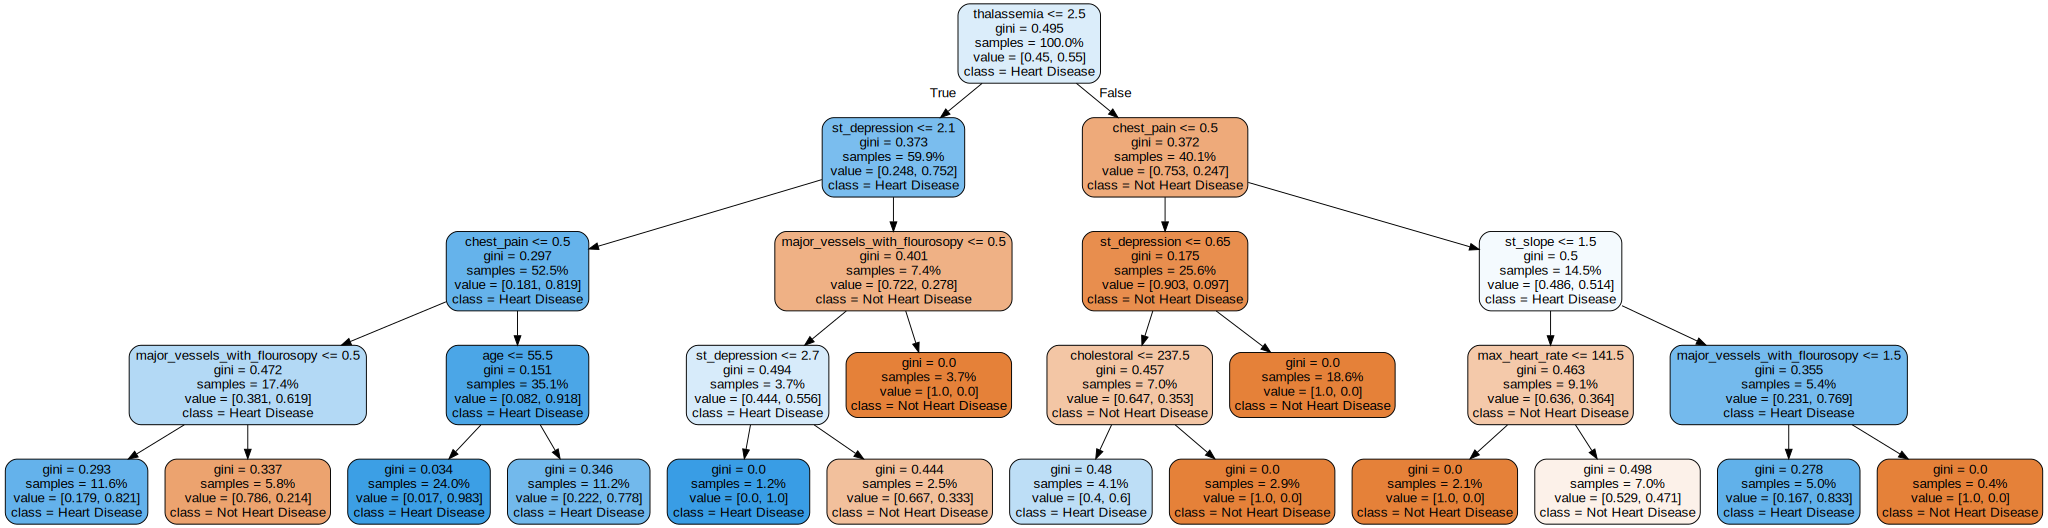

In [21]:
dt = tree.DecisionTreeClassifier(max_depth = 4)
dt.fit(XA_train, ya_train)
dot_data = tree.export_graphviz(dt, out_file = None, filled = True, 
                               rounded= True, feature_names = features_response[:-1],
                                proportion=True, class_names = ['Not Heart Disease', 'Heart Disease'])
graph = graphviz.Source(dot_data)
graph

In [22]:
ya_pred = dt.predict(XA_test)
confusionmatrix = metrics.confusion_matrix(ya_test, ya_pred)
confusionmatrix

array([[21,  8],
       [ 3, 29]])

The Decision Trees accuracy is 0.819672131147541


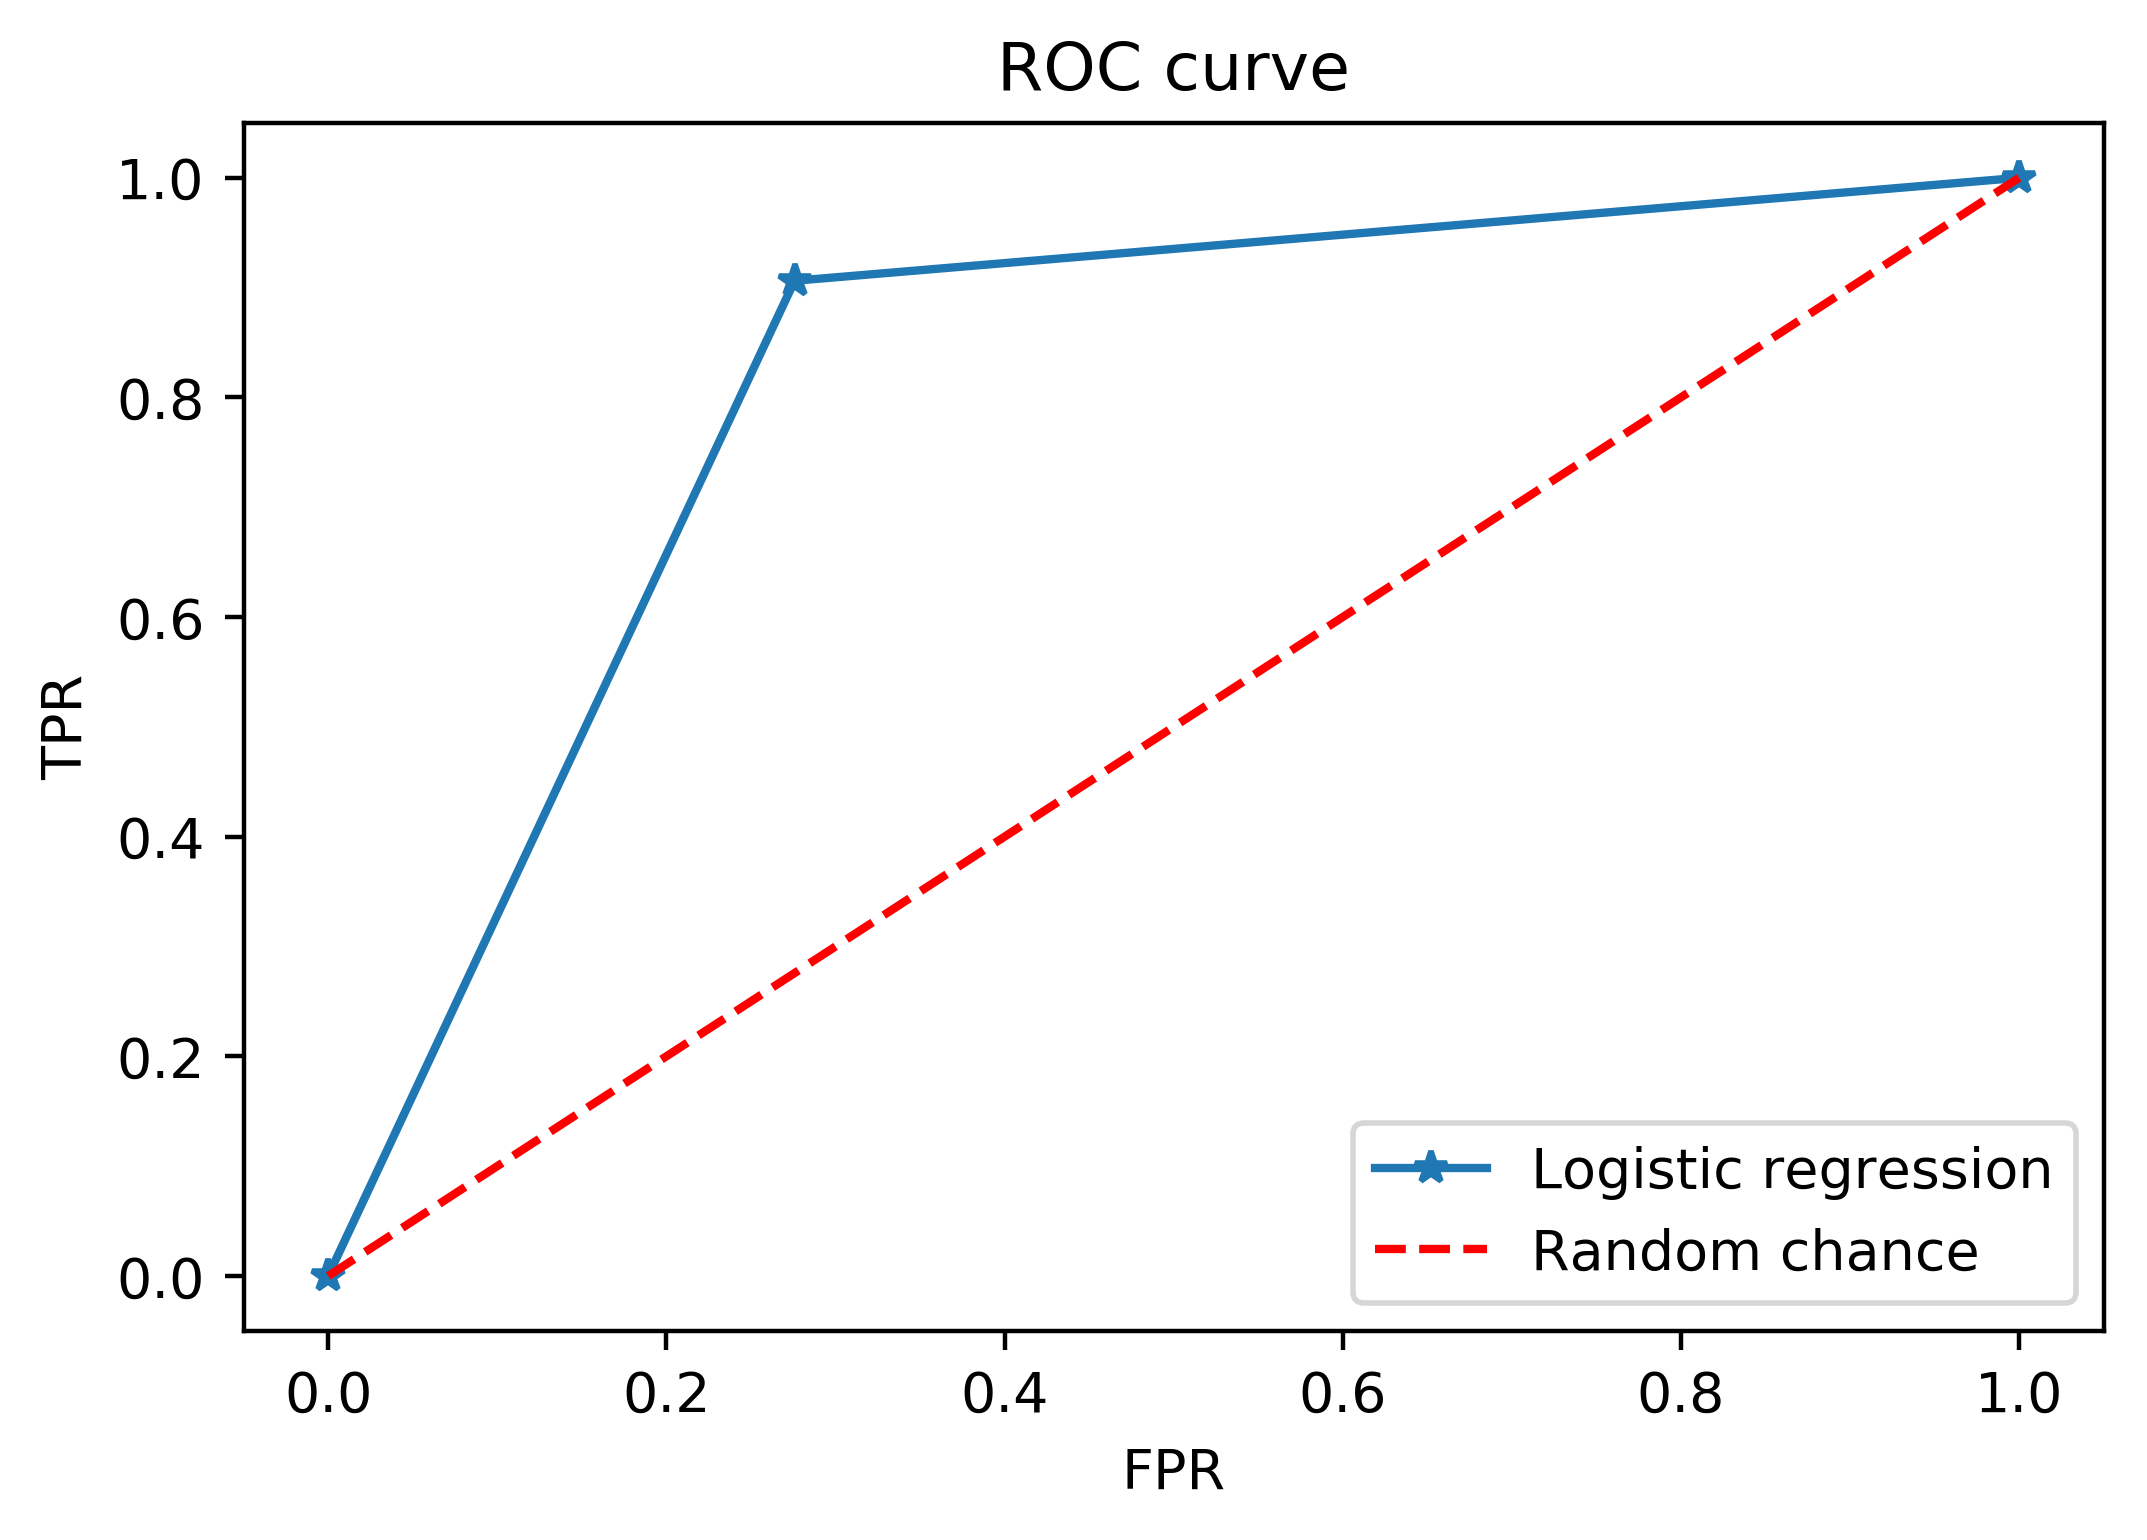

In [23]:
#plot an roc auc curve
fpr,tpr, thresholds = metrics.roc_curve(ya_test, ya_pred)
plt.plot(fpr,tpr,'*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression','Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
acc = metrics.accuracy_score(ya_test,ya_pred)
print('The Decision Trees accuracy is {}'.format(acc))

In [24]:
P = sum(ya_test)
TP = sum((ya_test==1) & ya_pred==1)
FN = sum((ya_test==1) & (ya_pred==0))
N = sum(ya_test ==0)
TN = sum((ya_test==0)&(ya_pred==0))
FP = sum((ya_test==0) & (ya_pred==1))
SE = TP/(TP+FN)
SP= TN/(TN+FP)
print('The sensitivity is {} and the the specificity is {}'.format(SE,SP))

The sensitivity is 0.90625 and the the specificity is 0.7241379310344828


In [25]:
from sklearn.tree import export_graphviz

var_importance = list(dt.feature_importances_)
feature_importances1 = [(features, round(importance,2)) for features, importance in zip(feature_list, var_importance)]


feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances1];

Variable: thalassemia          Importance: 0.39
Variable: st_depression        Importance: 0.18
Variable: chest_pain           Importance: 0.17
Variable: major_vessels_with_flourosopy Importance: 0.14
Variable: cholestoral          Importance: 0.04
Variable: st_slope             Importance: 0.04
Variable: age                  Importance: 0.02
Variable: max_heart_rate       Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: resting_blood_pressure Importance: 0.0
Variable: fasting_blood_sugar  Importance: 0.0
Variable: resting_ECG          Importance: 0.0
Variable: angina_from_exercise Importance: 0.0


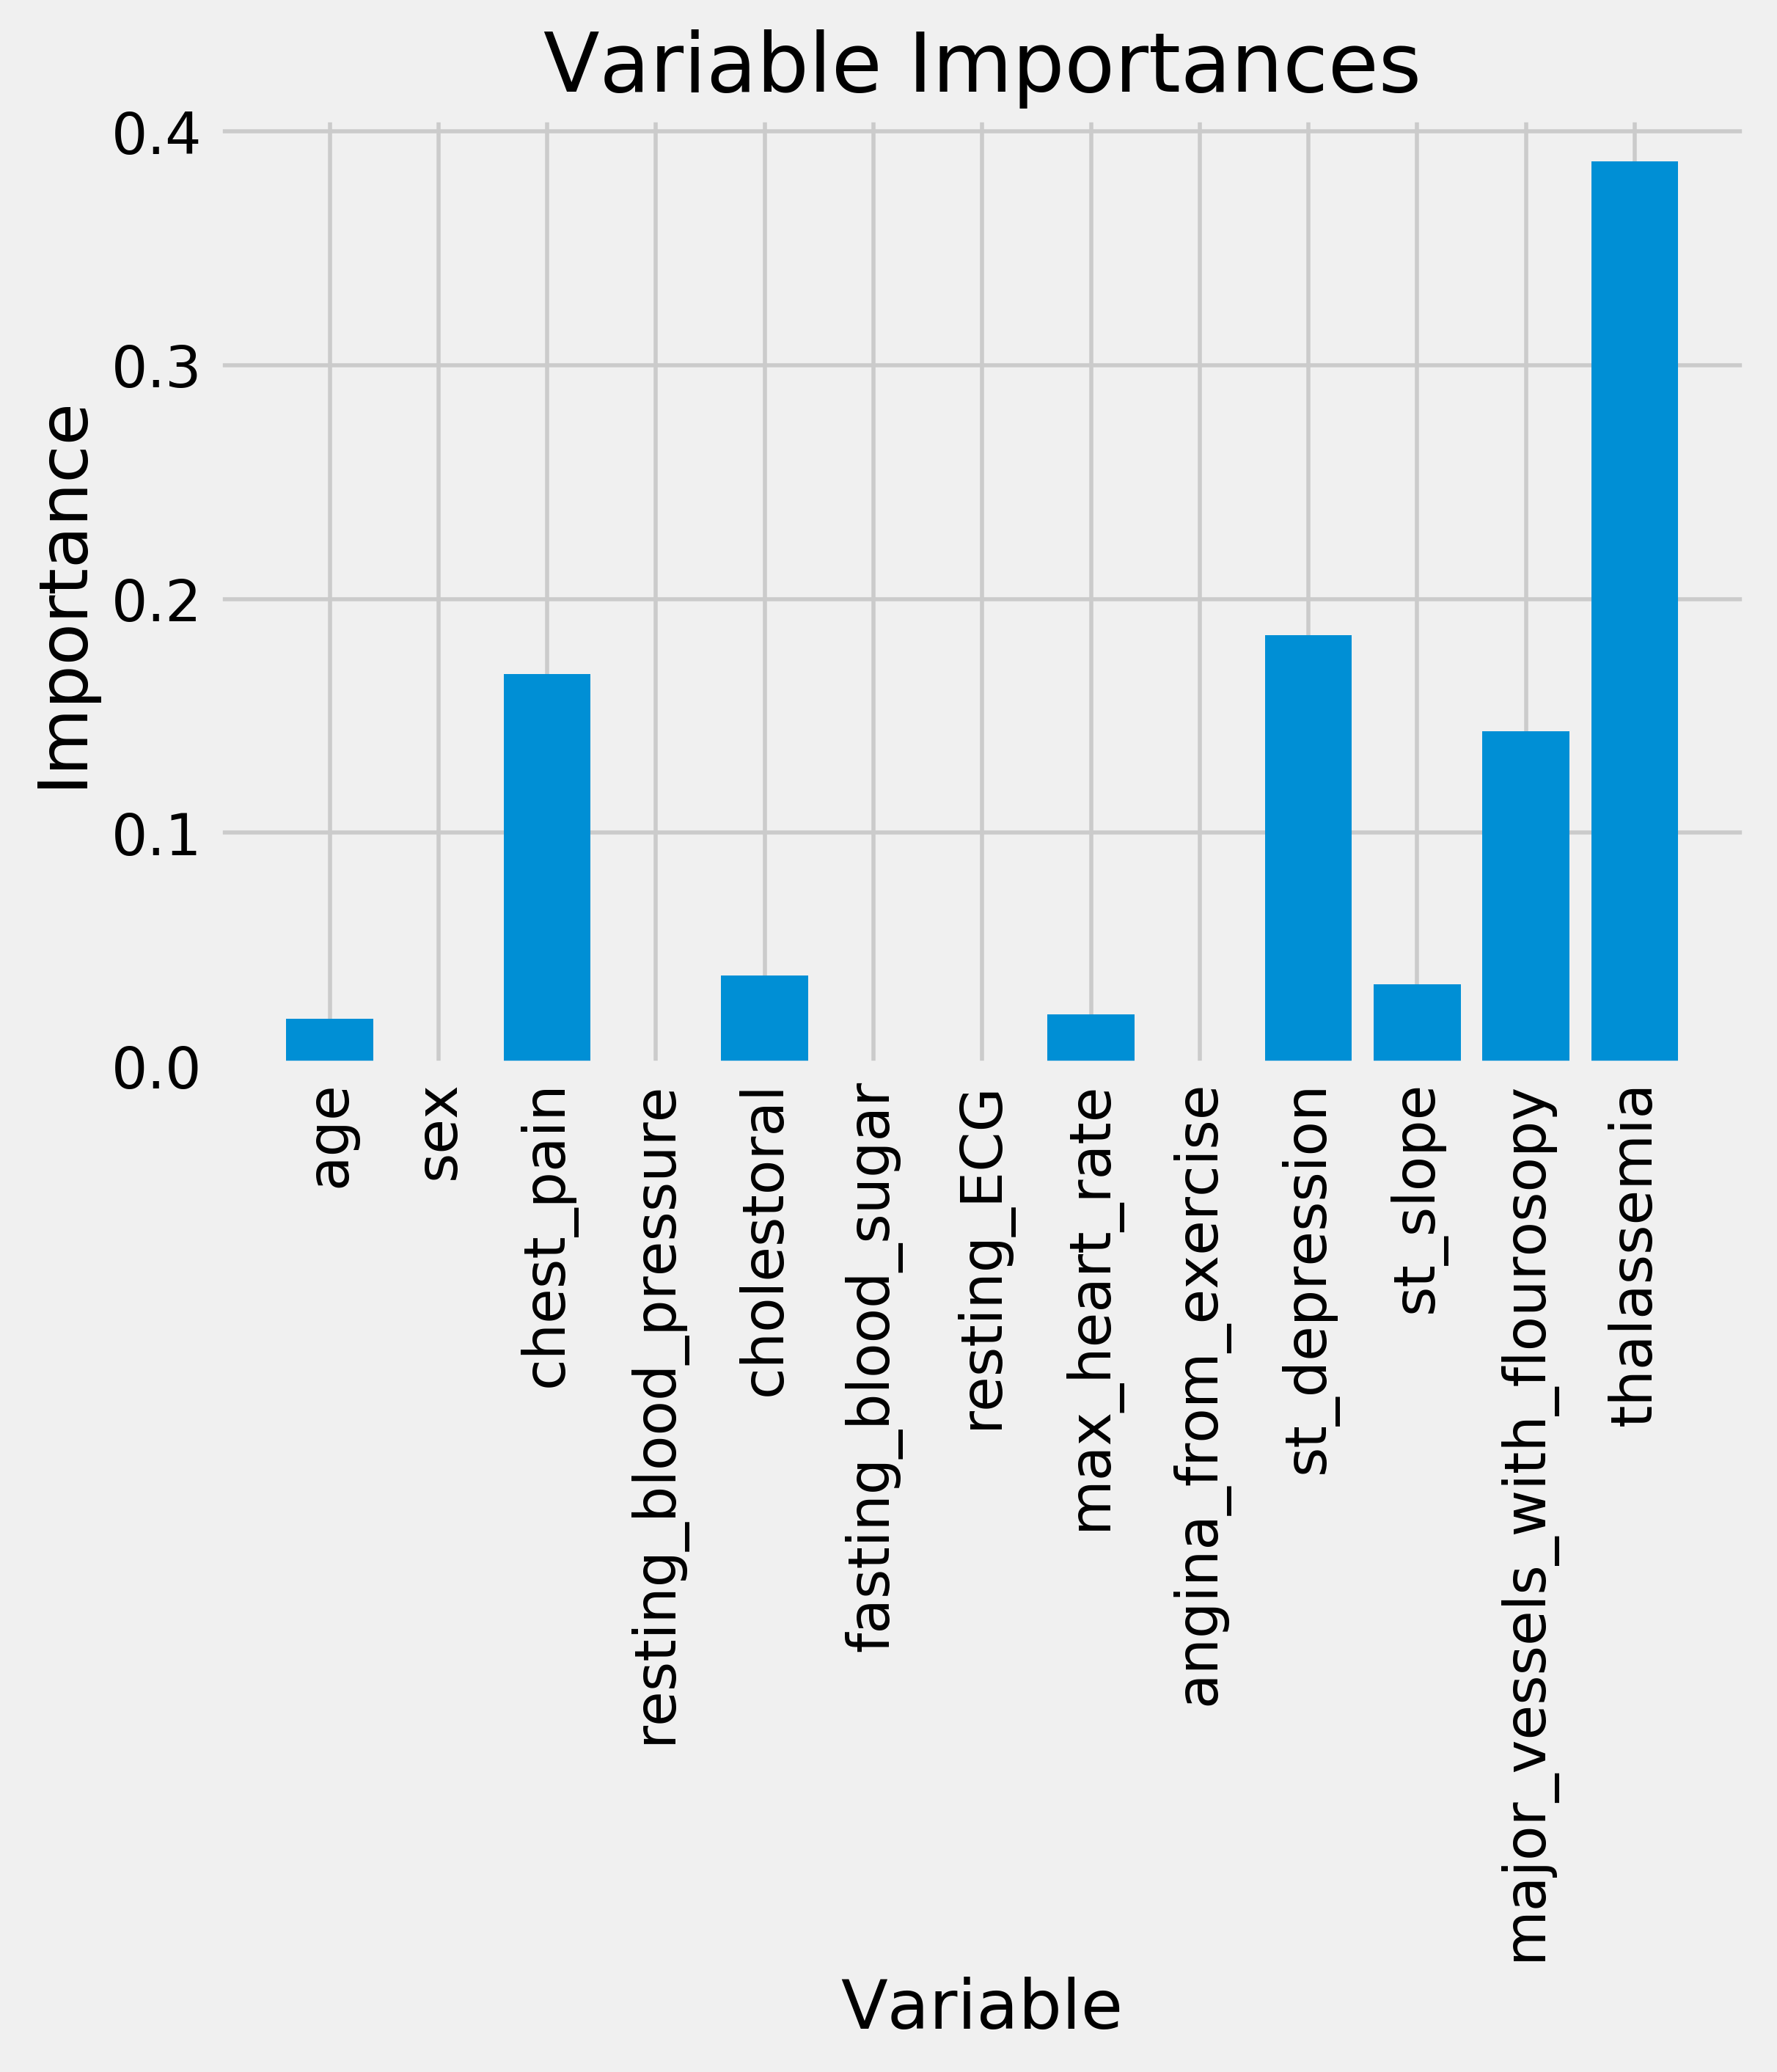

In [26]:
#Plotting variable importance
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(var_importance)))
# Make a bar chart
plt.bar(x_values, var_importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


Using a random forest classifier for the decision tree

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [28]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(XA_train, ya_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
rf_pred = clf.predict(XA_test)

acc2 = metrics.accuracy_score(ya_test,rf_pred)
print('The Decision Trees accuracy is {}'.format(acc2))

The Decision Trees accuracy is 0.8688524590163934


In [30]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in clf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 90
Average maximum depth 10


In [31]:
from sklearn.tree import export_graphviz

var_importance1 = list(clf.feature_importances_)
feature_importances2 = [(features, round(importance,2)) for features, importance in zip(feature_list, var_importance1)]


feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances2];

Variable: max_heart_rate       Importance: 0.16
Variable: thalassemia          Importance: 0.16
Variable: cholestoral          Importance: 0.1
Variable: st_depression        Importance: 0.1
Variable: chest_pain           Importance: 0.09
Variable: age                  Importance: 0.08
Variable: major_vessels_with_flourosopy Importance: 0.08
Variable: resting_blood_pressure Importance: 0.07
Variable: st_slope             Importance: 0.07
Variable: angina_from_exercise Importance: 0.04
Variable: sex                  Importance: 0.03
Variable: resting_ECG          Importance: 0.02
Variable: fasting_blood_sugar  Importance: 0.01


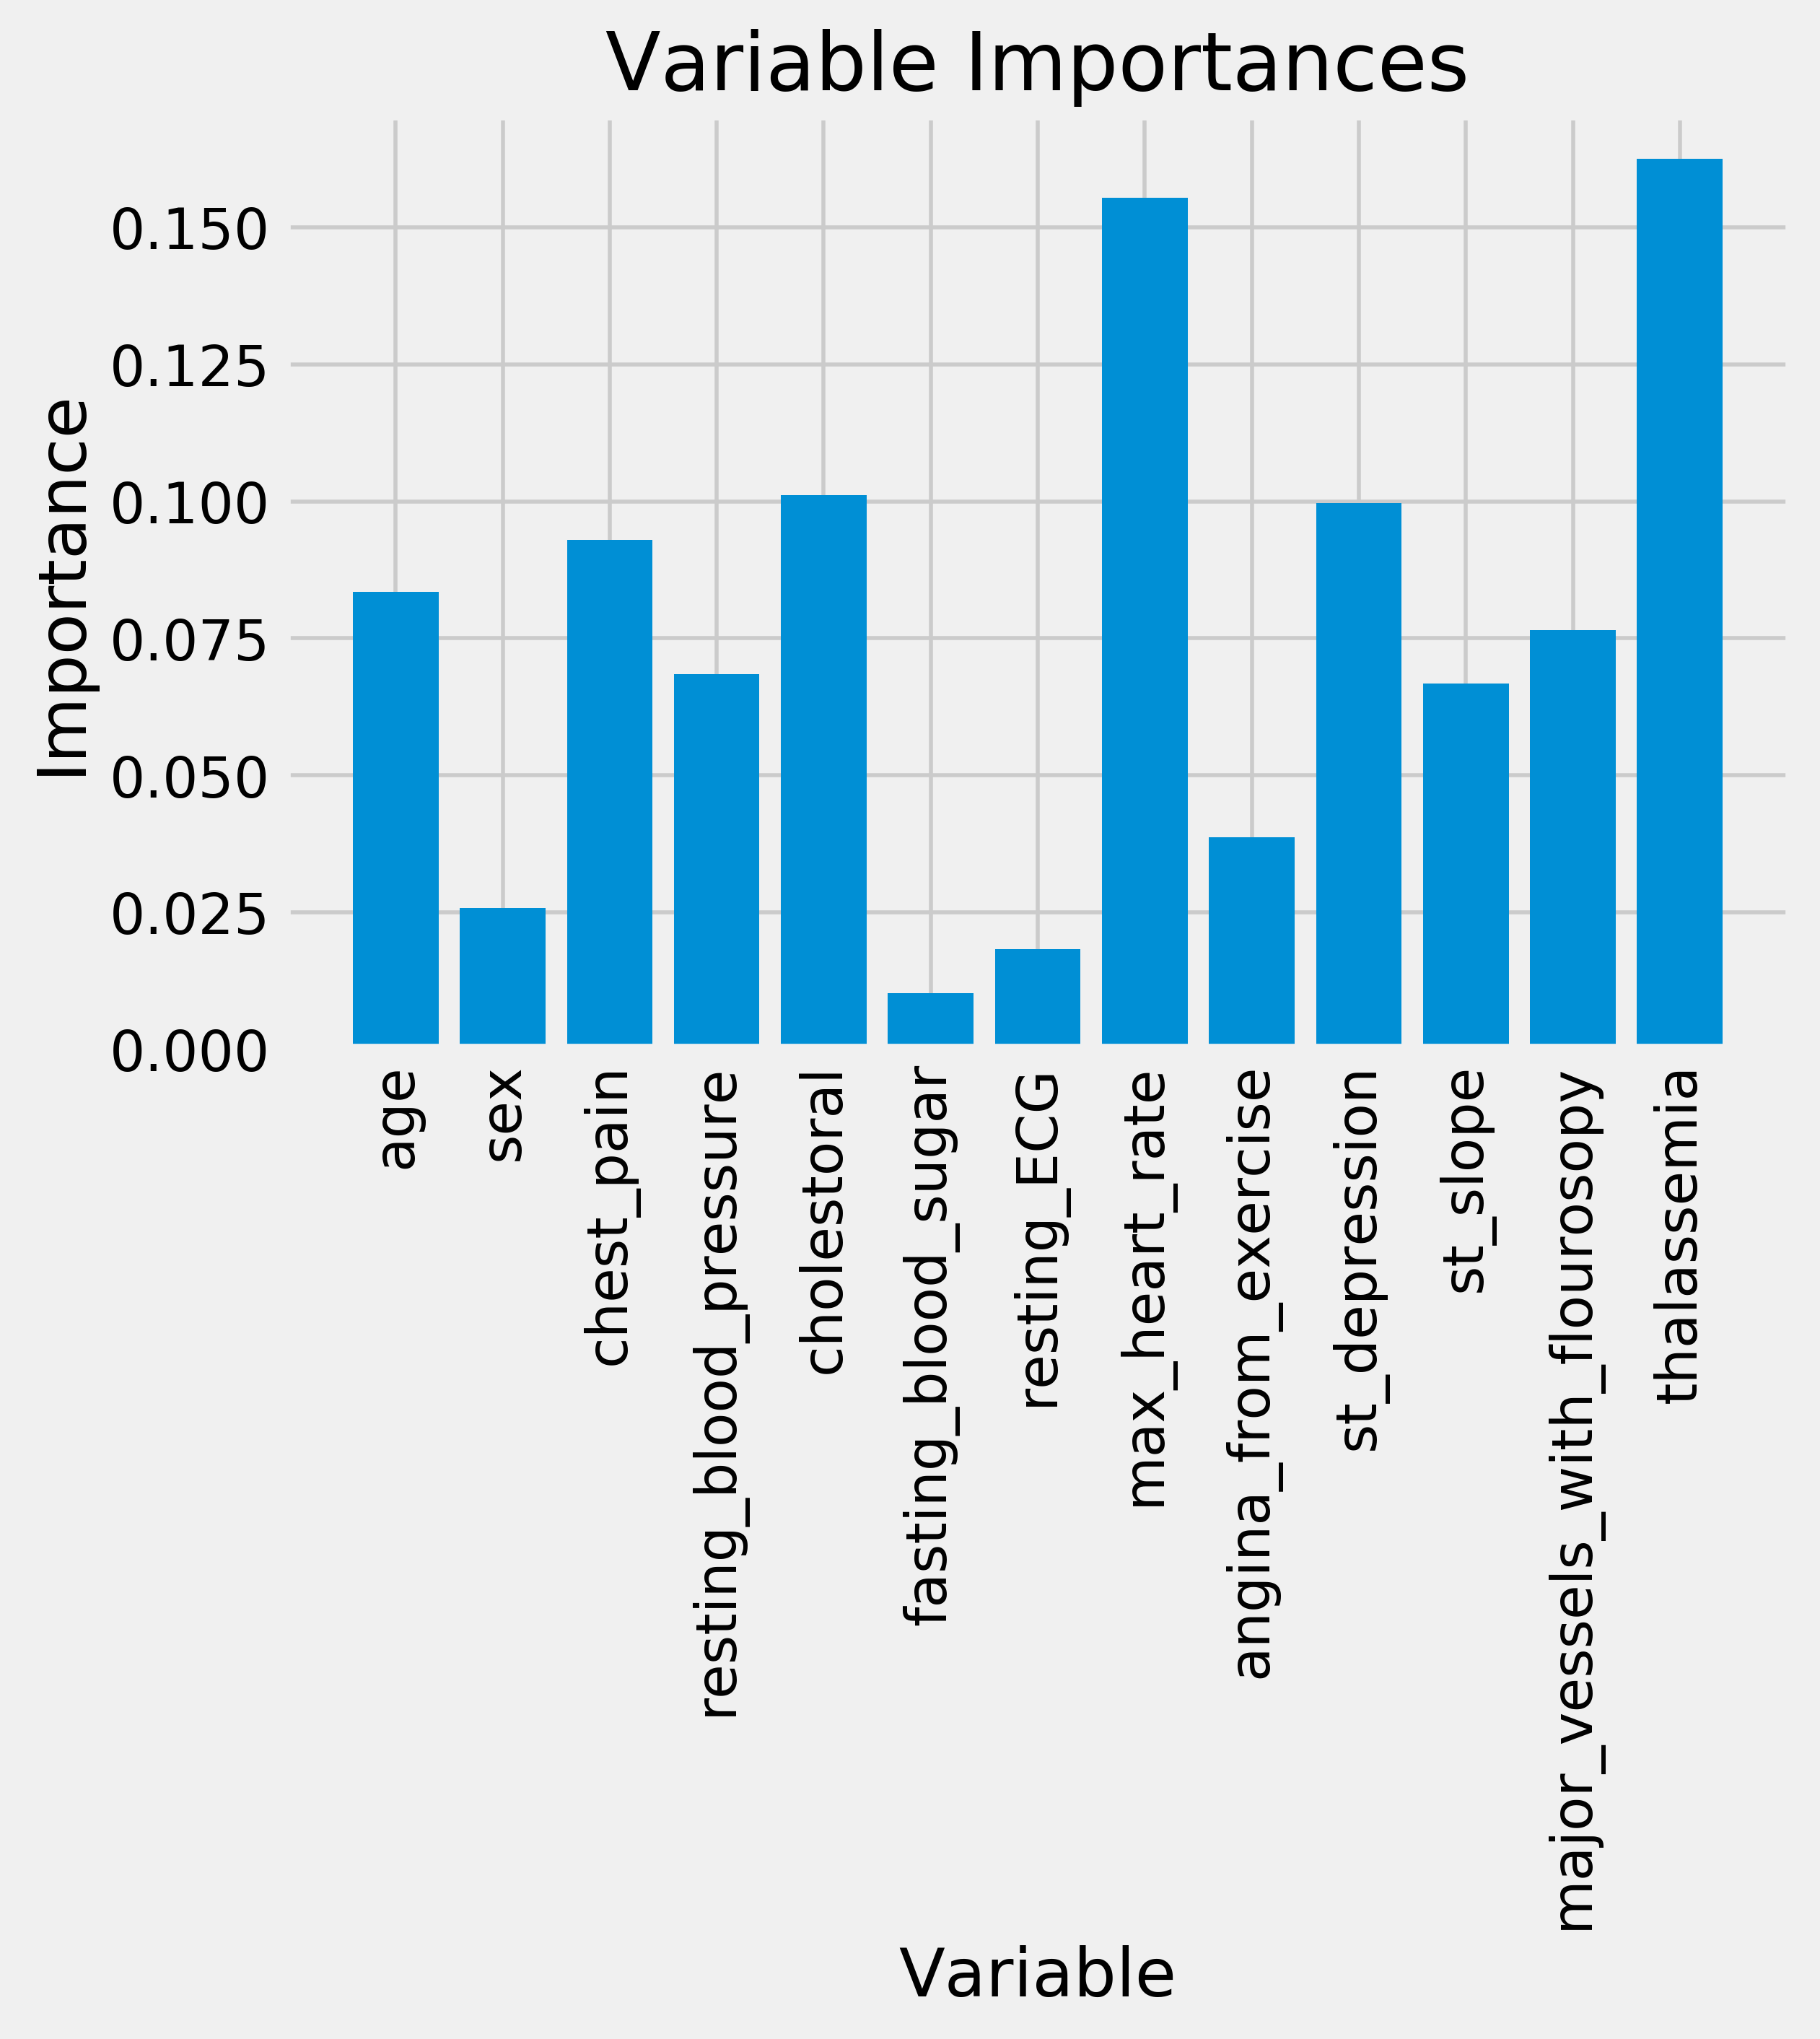

In [32]:
#Plotting variable importance
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(var_importance1)))
# Make a bar chart
plt.bar(x_values, var_importance1, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [33]:
features_response = df.columns.tolist()

items_to_remove = ['age', 'cholestoral', 'st_slope','max_heart_rate','sex', 'resting_blood_pressure', 'fasting_blood_sugar', 'resting_ECG','angina_from_exercise','target']

features_response = [item for item in features_response if item not in items_to_remove]
features_response


['chest_pain', 'st_depression', 'major_vessels_with_flourosopy', 'thalassemia']

In [34]:
newXA_train, newXA_test, newya_train, newya_test = \
train_test_split(df[features_response[:-1]].values, df['target'].values, 
                test_size=0.2, random_state = 24)